In [1]:
import torch
import torchvision

import torch.nn as nn
import numpy as np
import torch.nn.functional as F
import matplotlib.pyplot as plt

from torchvision import transforms
from torch.optim import SGD

In [2]:
class MnistSoftMaxModel(nn.Module):
    def __init__(self):
        super().__init__()

        self.linear1 = nn.Linear(784, 100)
        self.linear2 = nn.Linear(100, 50)
        self.linear3 = nn.Linear(50, 10)

    def forward(self, x):
        x = torch.flatten(x, 1)
        x = self.linear1(x)
        x = F.relu(x)
        x = self.linear2(x)
        x = F.relu(x)
        x = self.linear3(x)
        # x = F.softmax(x)

        return x

In [3]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

batch_size = 100
train_set = torchvision.datasets.MNIST(root='./data/', train=True, download=False, transform=transform)
train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True, num_workers=2)

test_set = torchvision.datasets.MNIST(root='./data/', train=False, download=False, transform=transform)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=batch_size, shuffle=False, num_workers=2)

In [4]:
# model
model = MnistSoftMaxModel()

# loss
loss_fn = nn.CrossEntropyLoss()

# Optimizer
optimizer = SGD(model.parameters(), lr=0.0001, momentum=0.9)

for epoch in range(1000):
    for i, data in enumerate(train_loader):
        inputs, labels = data
        # print(labels)
        # labels_one_hot = F.one_hot(labels, 10).double()
        # Zero your gradients for every batch!
        optimizer.zero_grad()
    
        # output of model
        outputs = model(inputs)
        
        loss = loss_fn(outputs, labels)
        loss.backward()
    
        optimizer.step()
        
        if i % 200 == 0:
            print(i)
            print(loss.item())
            # print('w Grad', torch.sum((inputs * (outputs - labels)) / 5))
            # print('b Grad', torch.sum((outputs - labels) / 5))
            print('---------')

0
2.3083889484405518
---------
200
2.267666816711426
---------
400
2.245852470397949
---------
0
2.207993984222412
---------
200
2.1700727939605713
---------
400
2.162902593612671
---------
0
2.1240453720092773
---------
200
2.0419318675994873
---------
400
2.0270395278930664
---------
0
1.8734785318374634
---------
200
1.8142985105514526
---------
400
1.7112385034561157
---------
0
1.6591157913208008
---------
200
1.4309481382369995
---------
400
1.392661690711975
---------
0
1.3030977249145508
---------
200
1.1795060634613037
---------
400
1.1703065633773804
---------
0
1.0697747468948364
---------
200
1.0260813236236572
---------
400
0.8907952904701233
---------
0
0.8285192847251892
---------
200
0.89191734790802
---------
400
0.7783496975898743
---------
0
0.719890832901001
---------
200
0.7116191983222961
---------
400
0.7686250805854797
---------
0
0.5647547245025635
---------
200
0.617458701133728
---------
400
0.5513999462127686
---------
0
0.5567306280136108
---------
200
0.63

In [5]:
all_test_inputs = None
all_test_labels = None

for j, data in enumerate(test_loader):
        inputs_test, labels_test = data 
        if all_test_inputs is None:
            all_test_inputs = inputs_test
            all_test_labels = labels_test
        else:
            all_test_inputs = torch.cat((all_test_inputs, inputs_test))
            all_test_labels = torch.cat((all_test_labels, labels_test))

In [6]:
def plot(img, label, prediction):
    plt.title(str(label) + ' ' + str(prediction))
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
    plt.show()

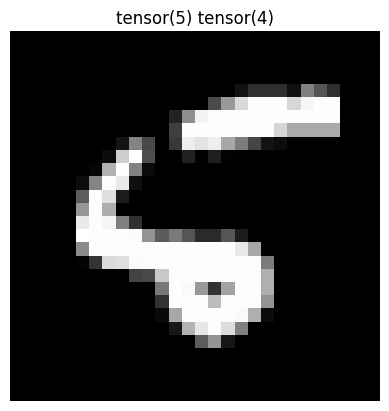

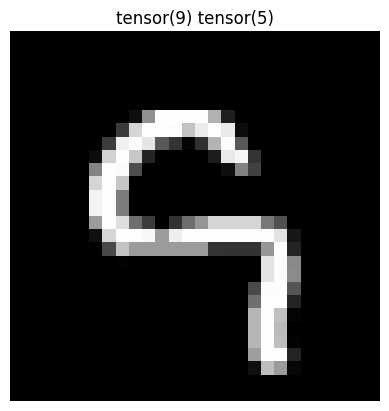

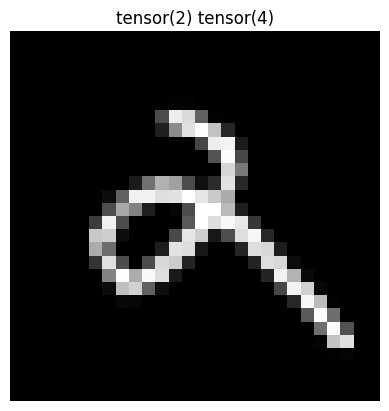

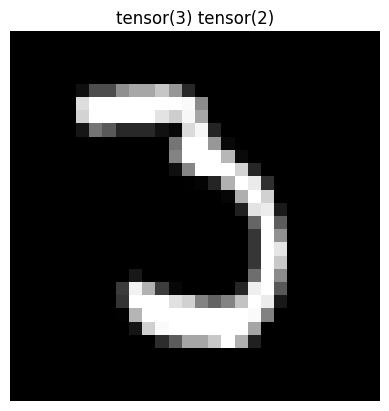

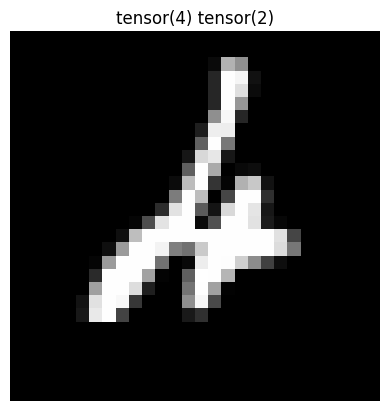

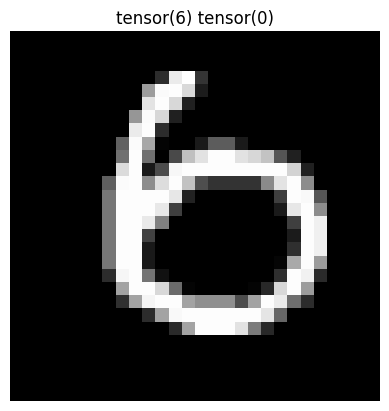

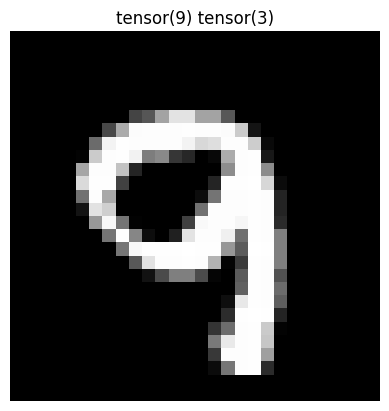

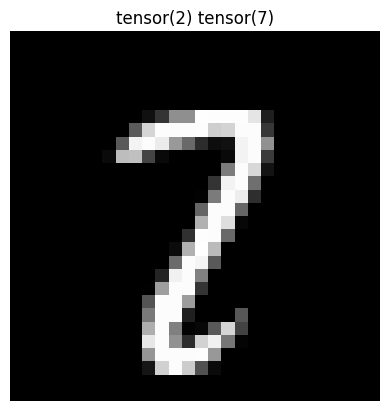

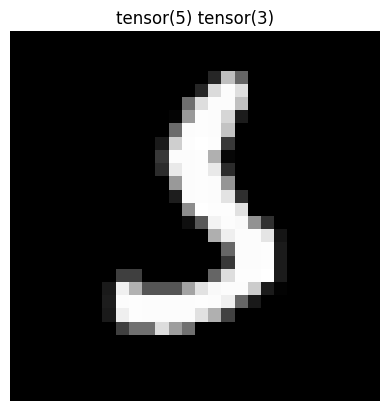

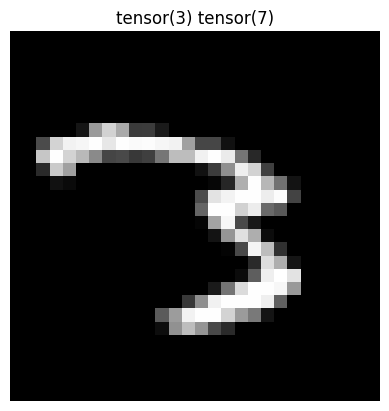

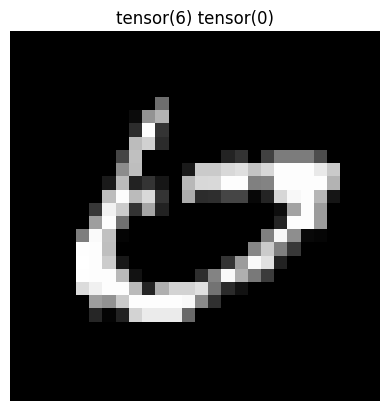

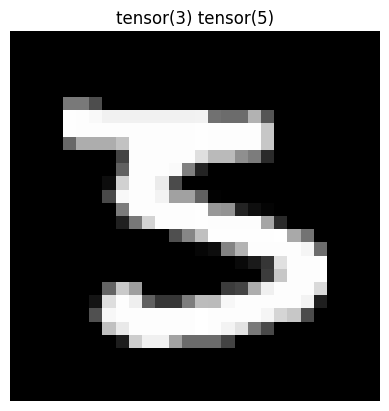

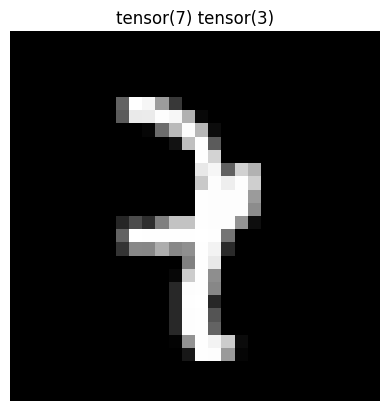

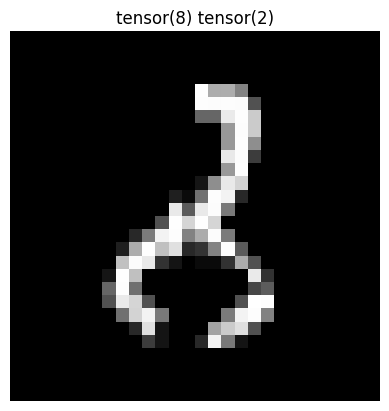

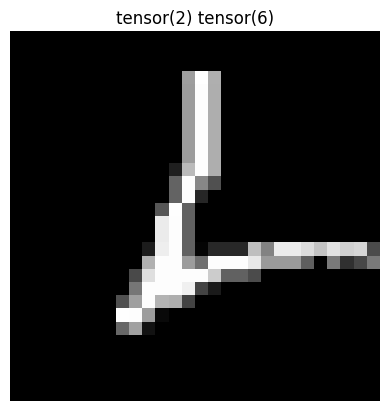

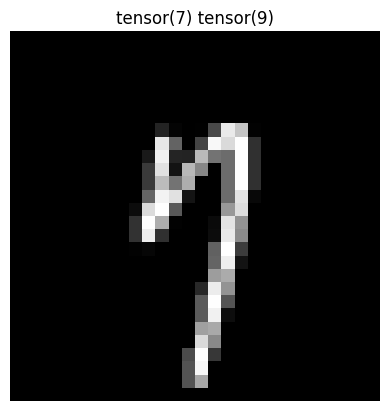

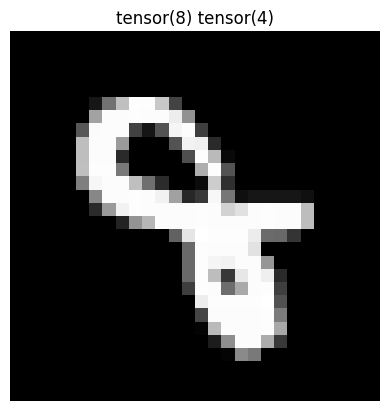

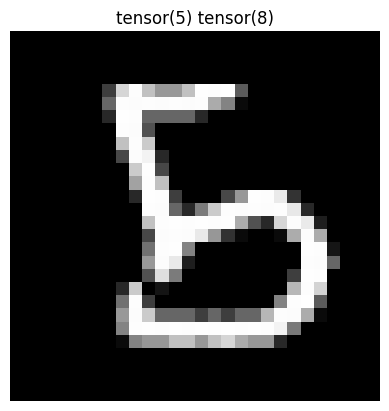

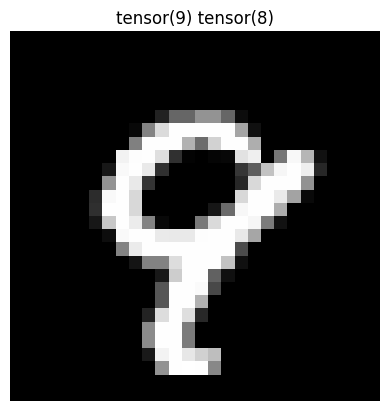

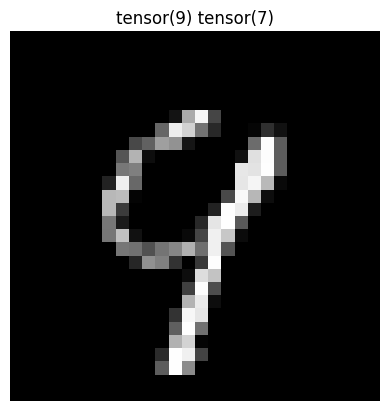

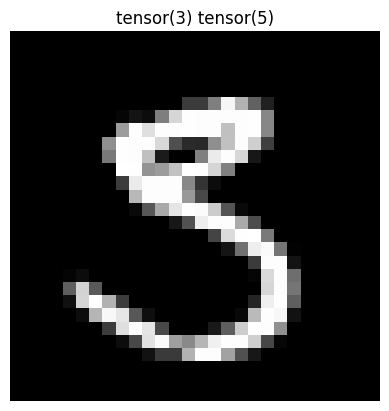

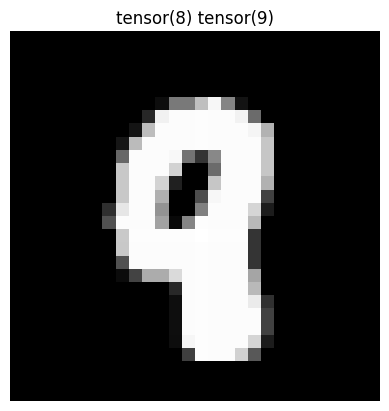

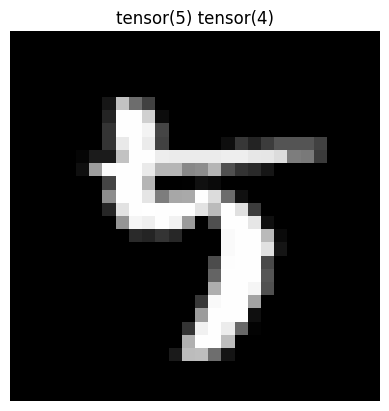

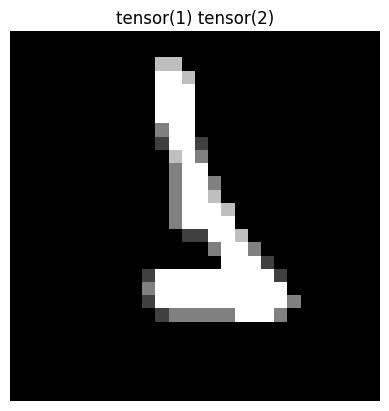

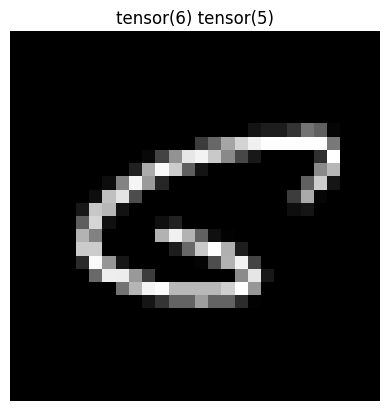

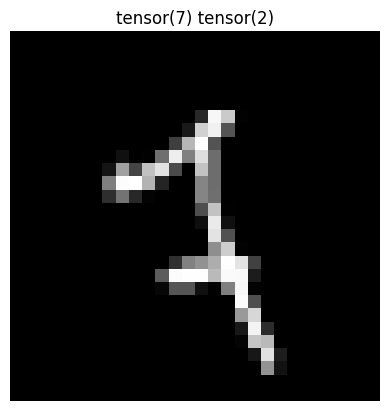

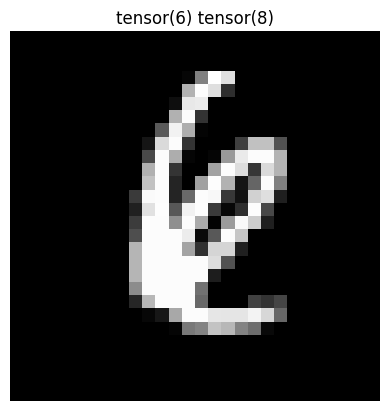

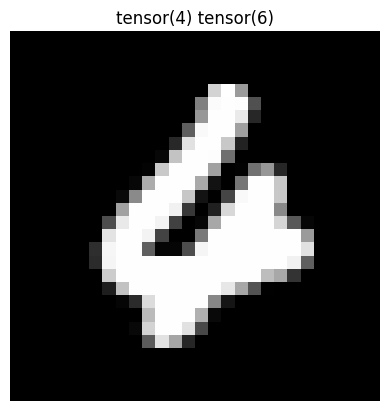

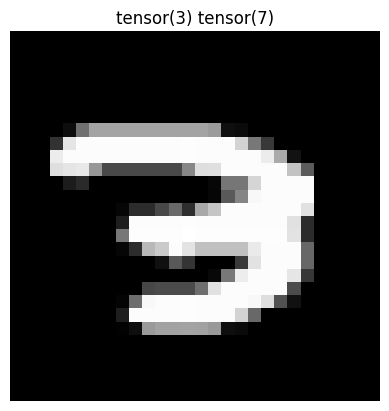

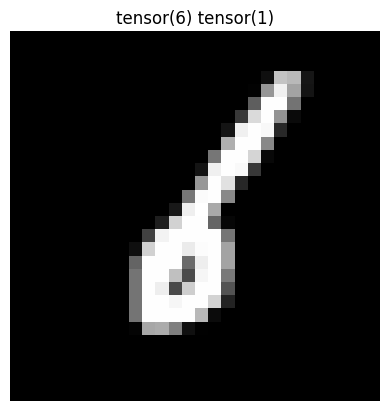

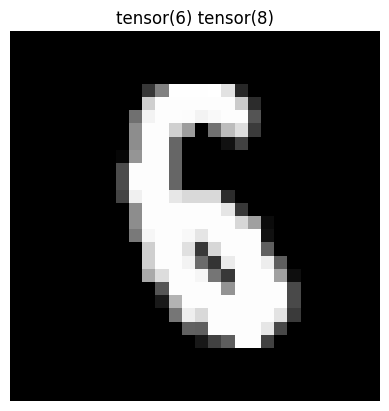

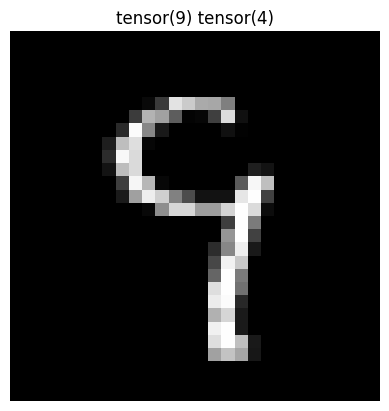

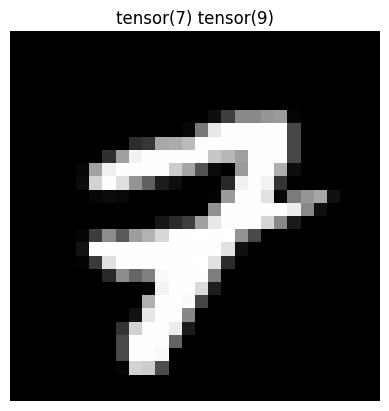

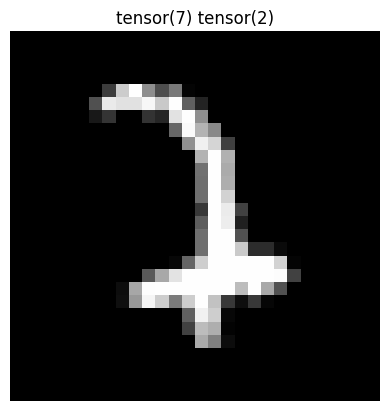

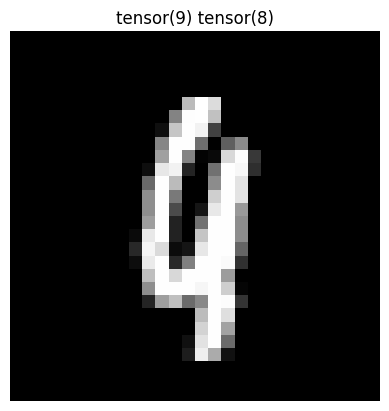

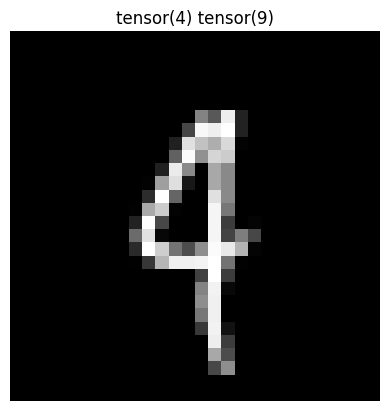

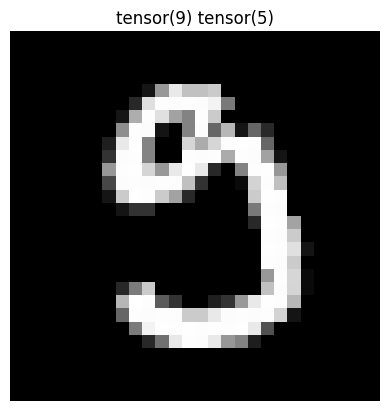

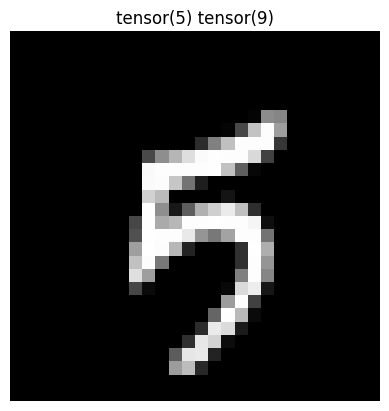

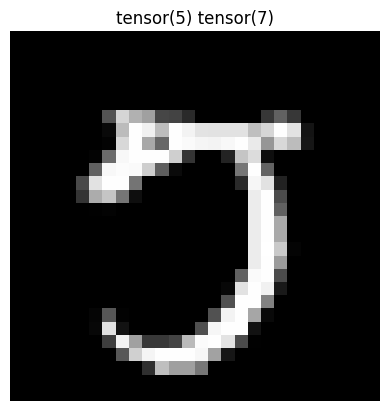

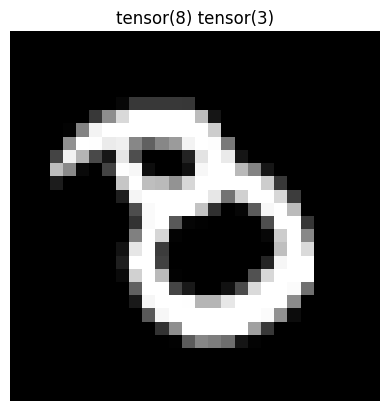

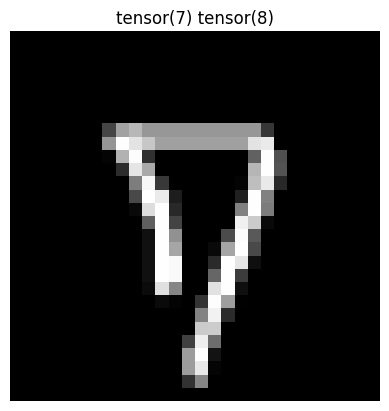

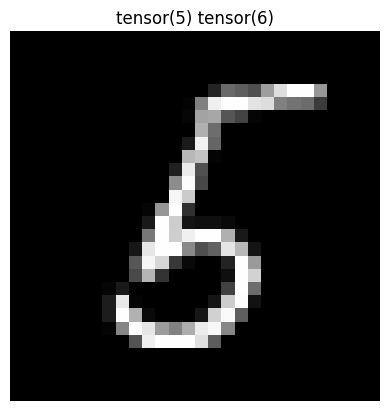

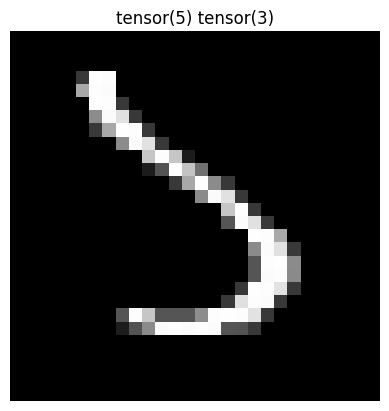

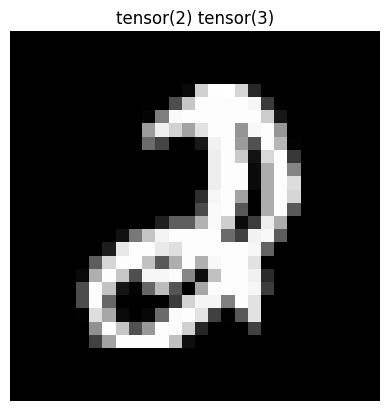

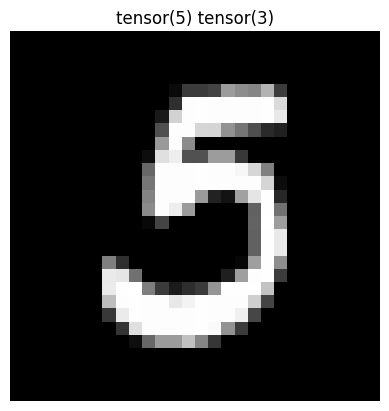

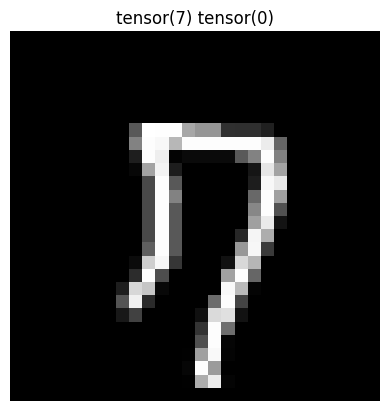

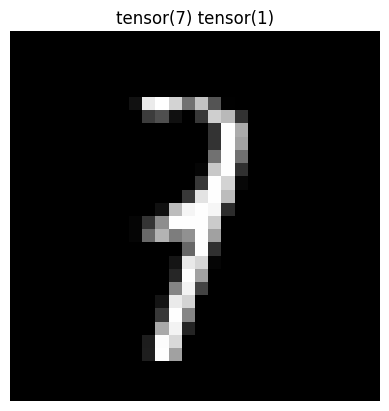

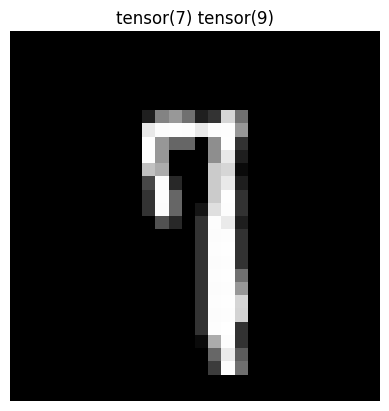

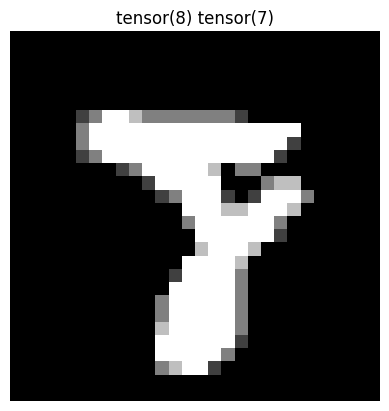

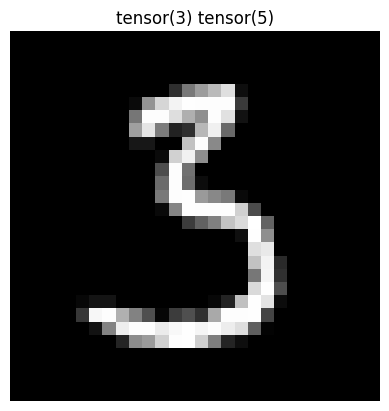

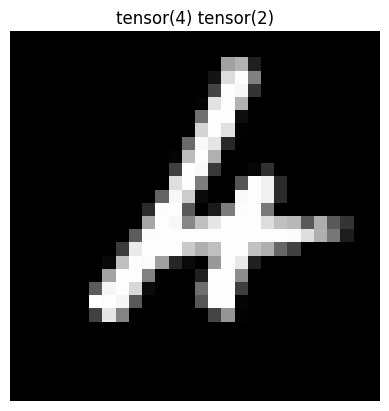

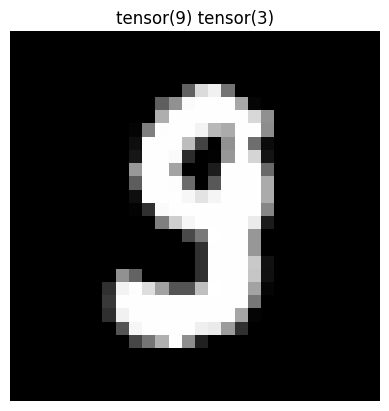

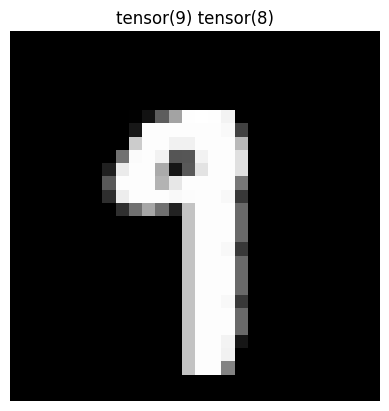

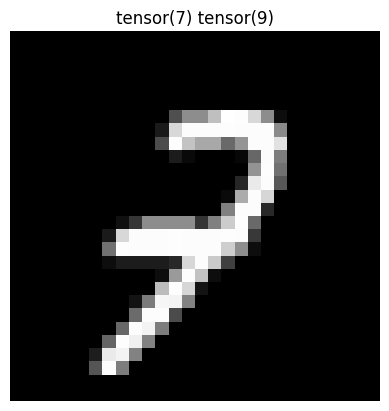

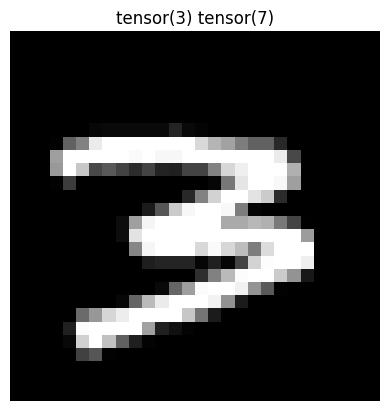

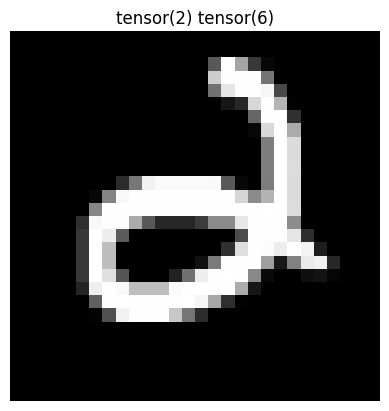

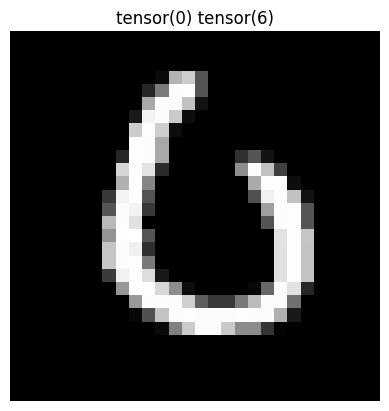

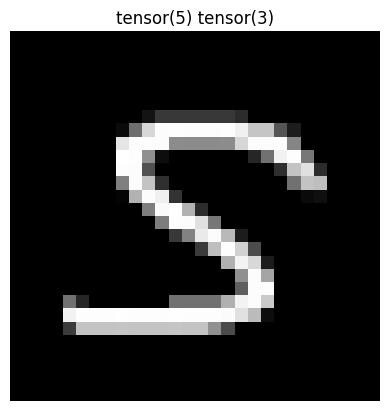

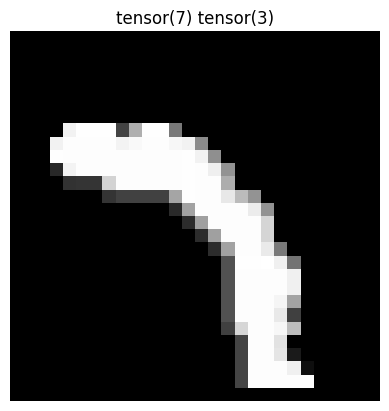

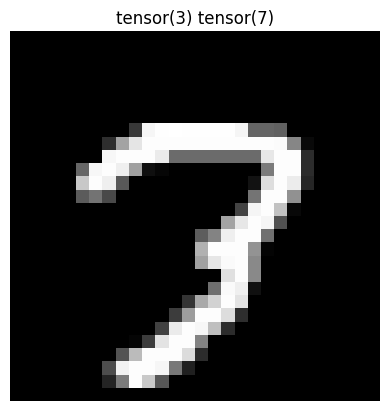

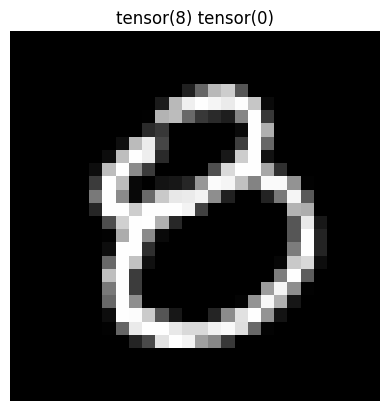

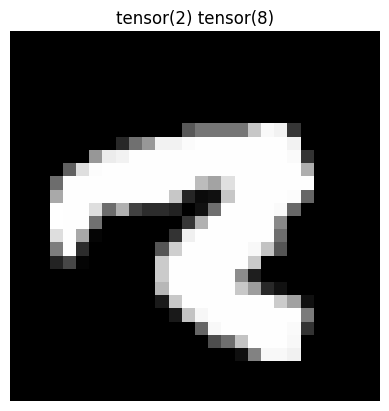

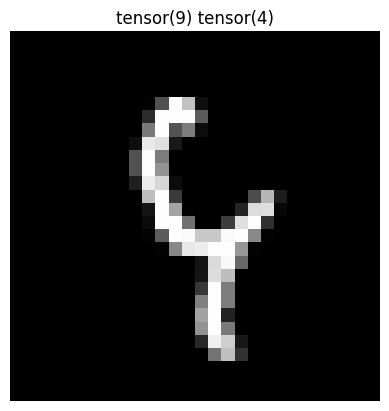

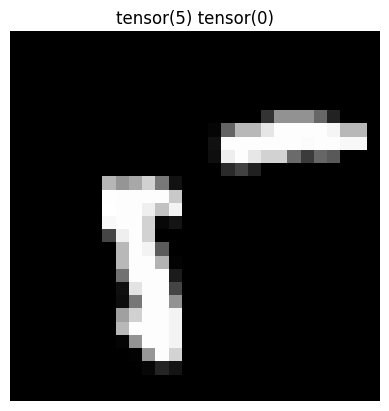

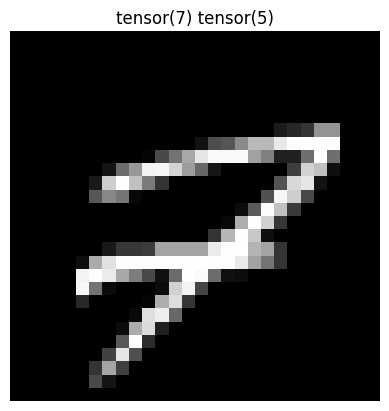

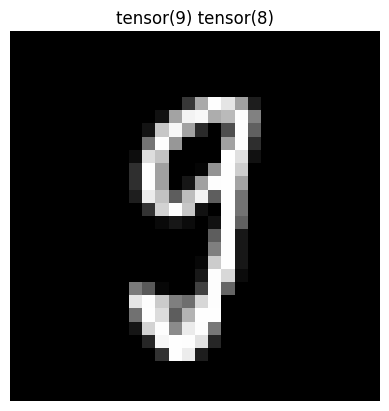

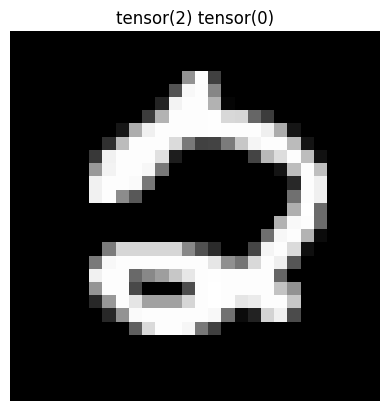

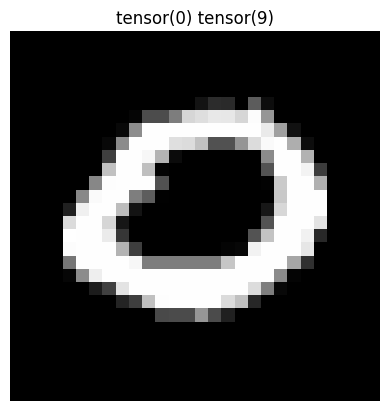

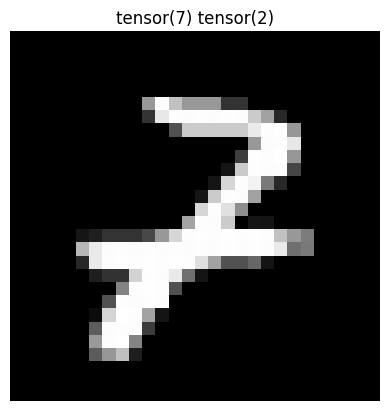

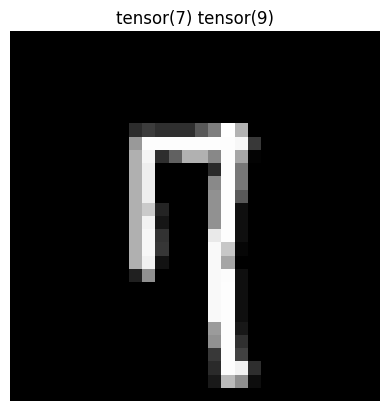

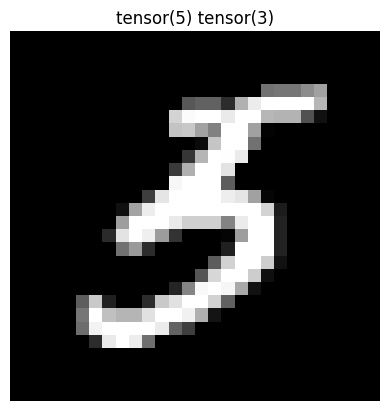

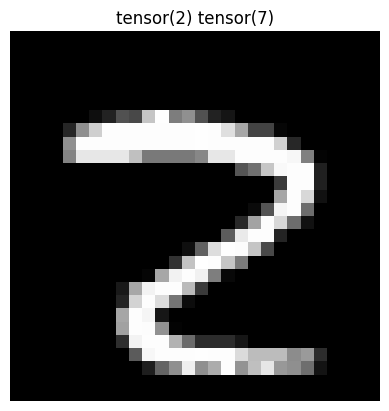

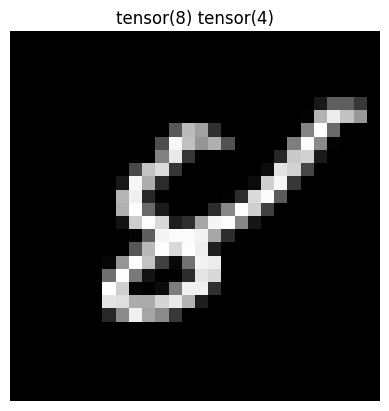

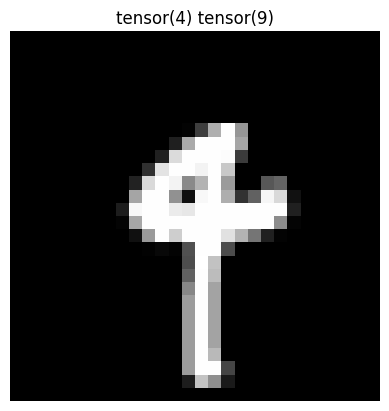

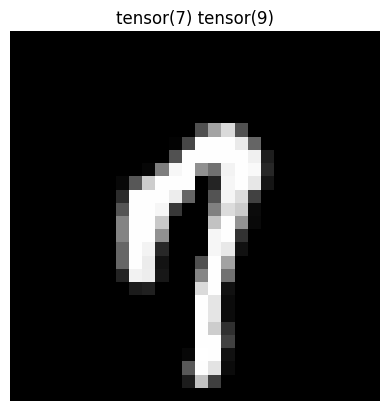

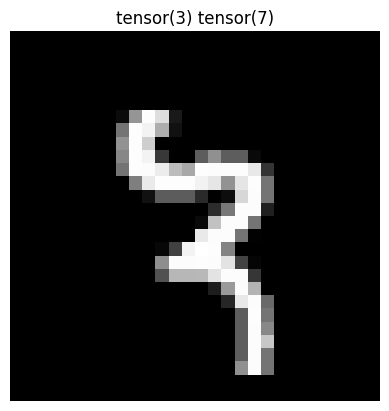

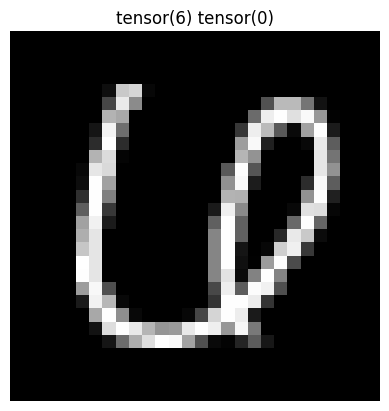

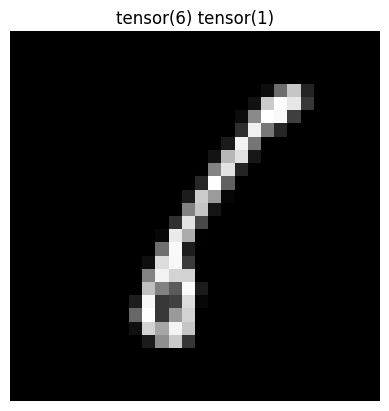

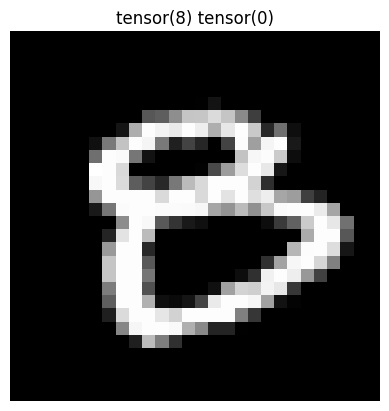

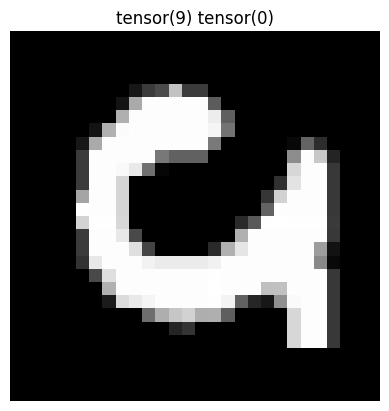

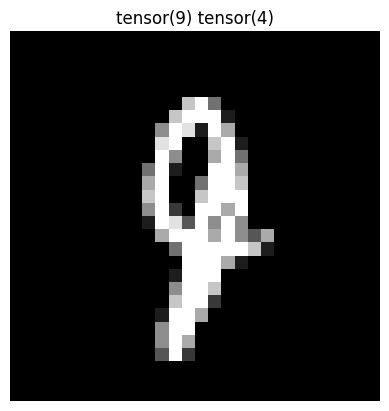

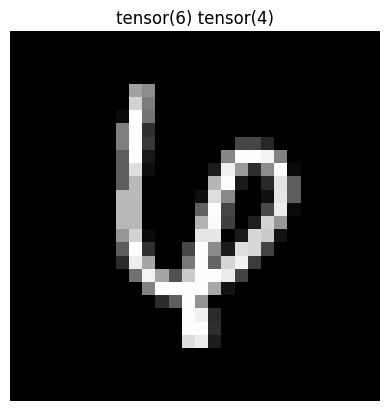

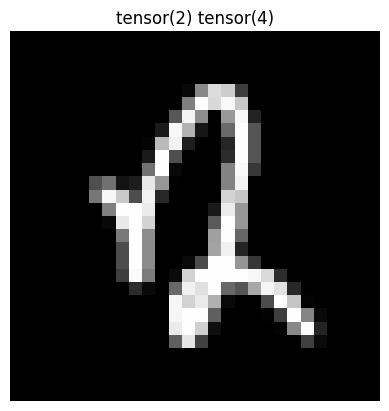

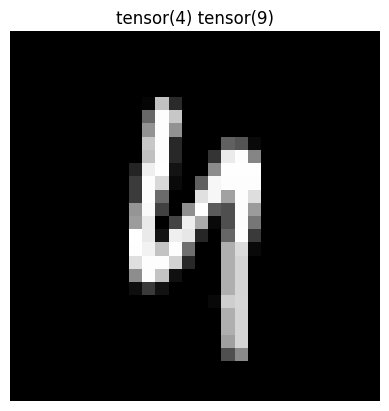

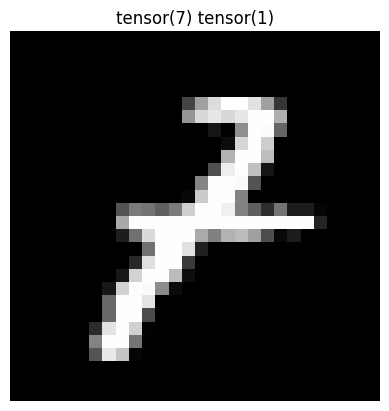

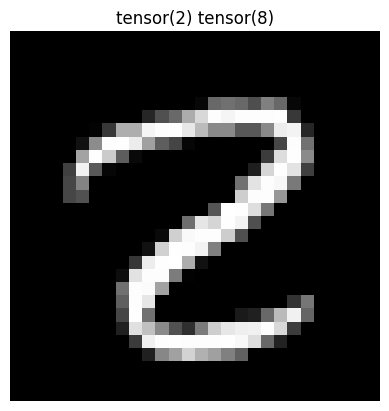

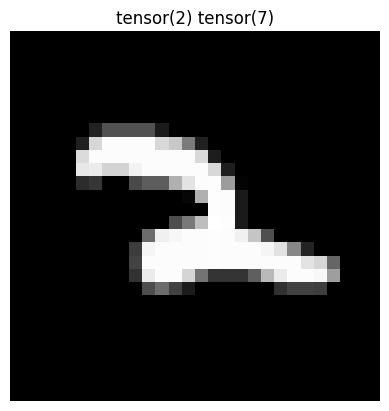

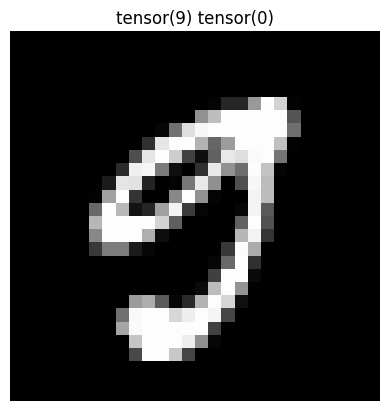

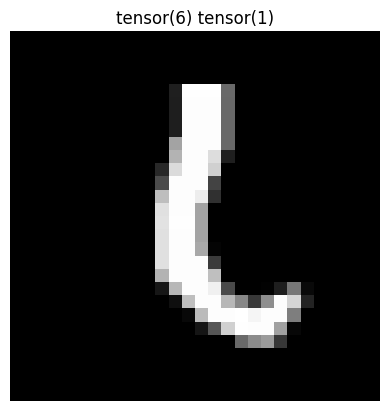

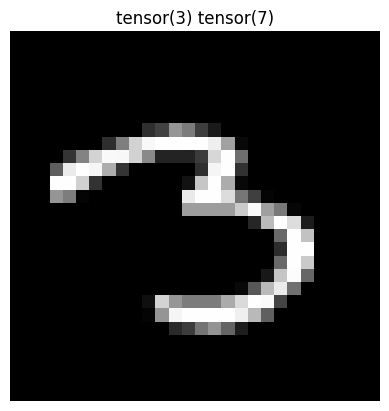

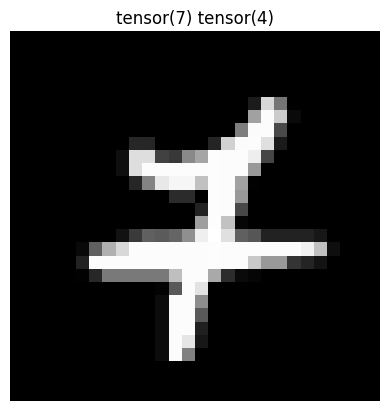

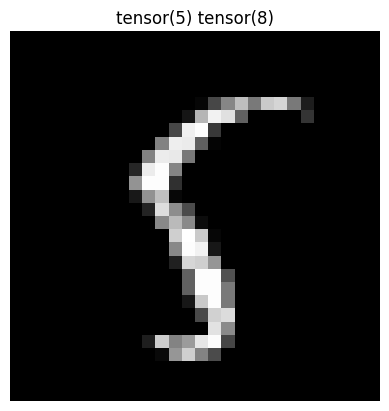

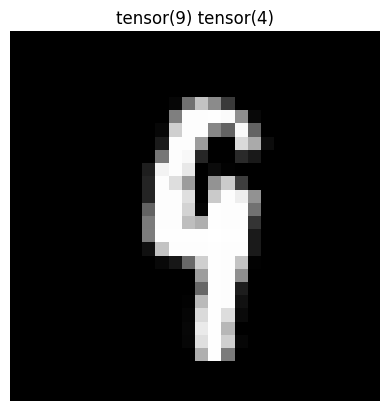

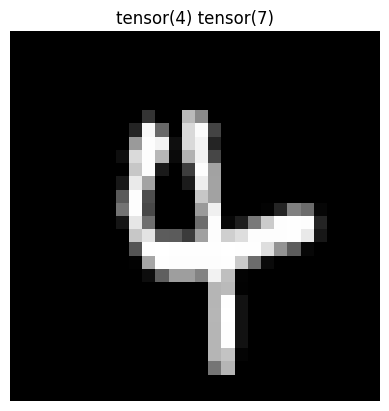

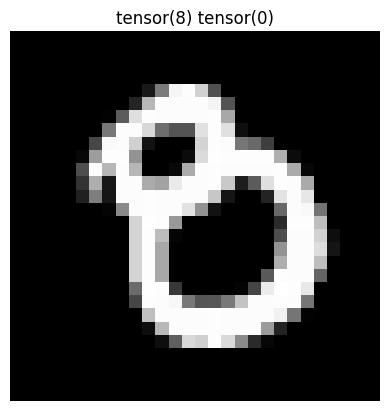

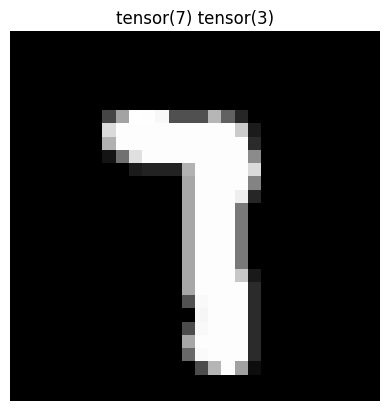

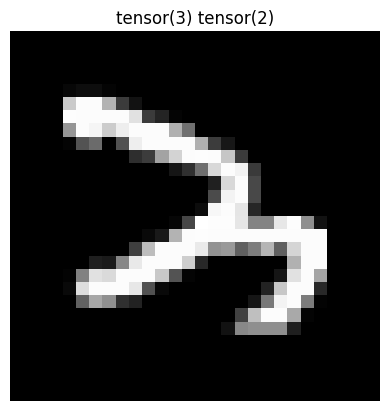

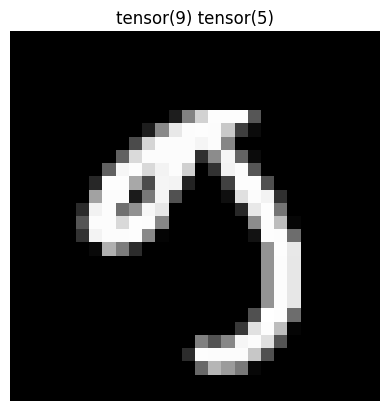

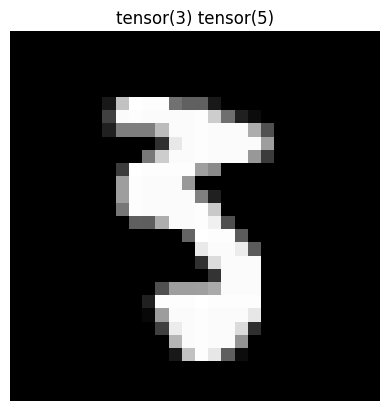

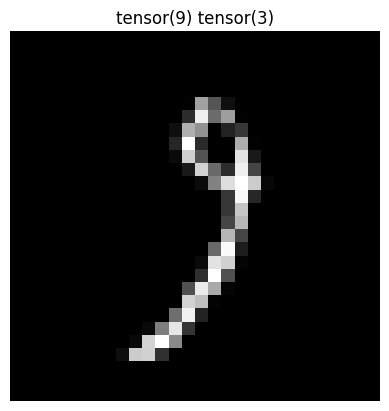

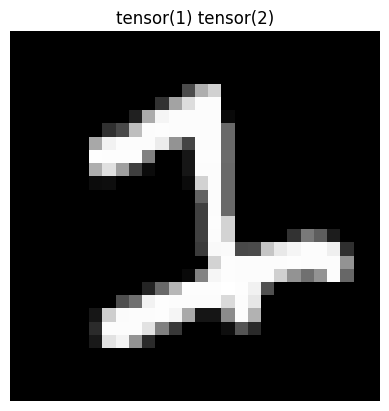

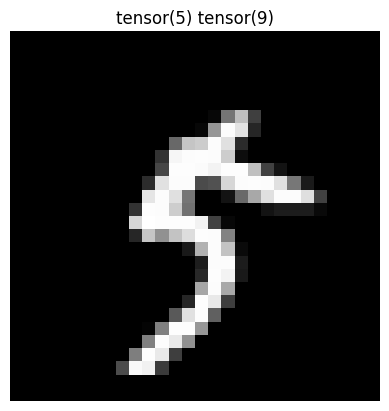

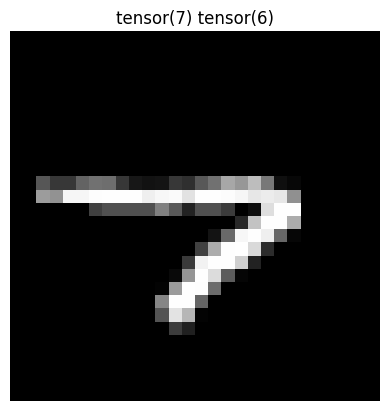

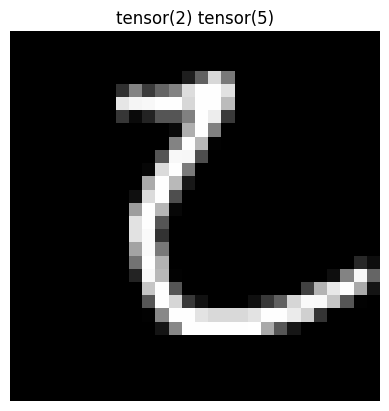

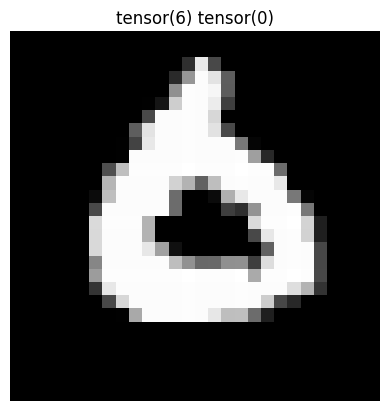

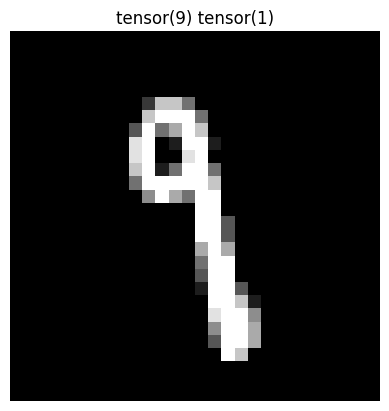

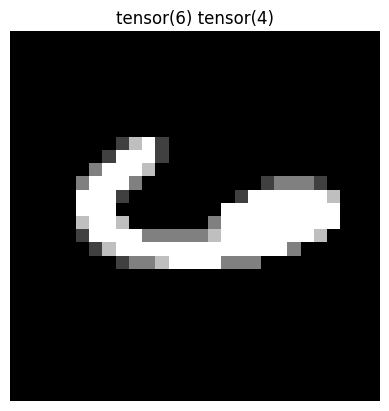

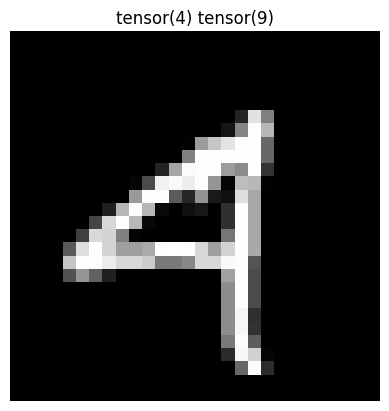

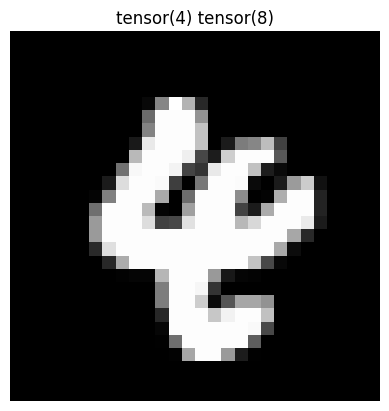

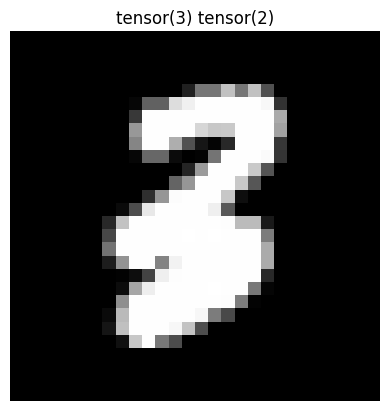

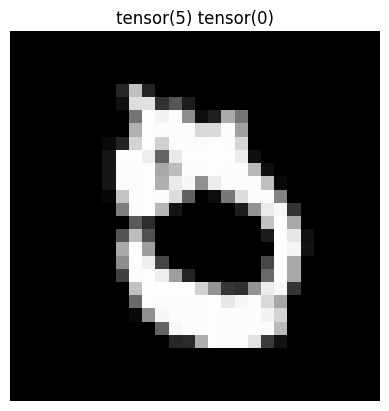

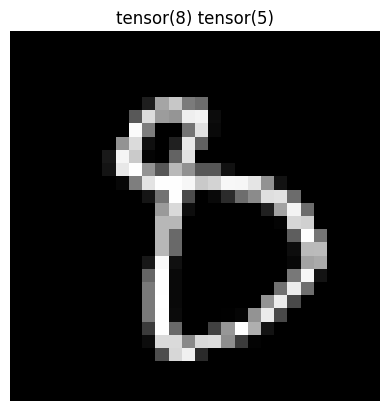

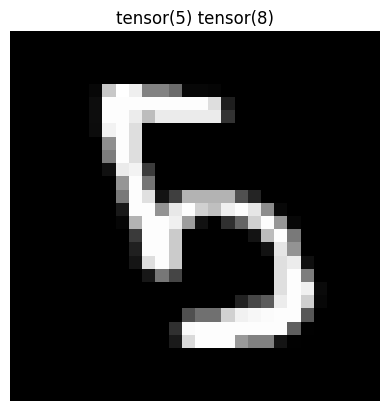

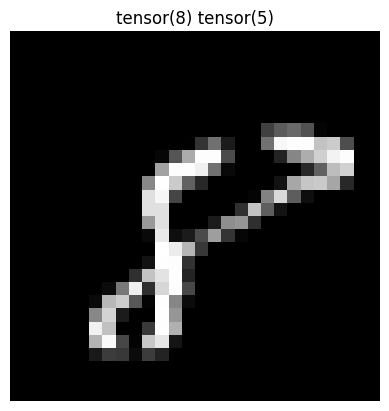

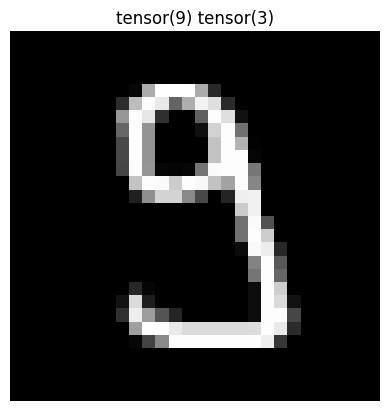

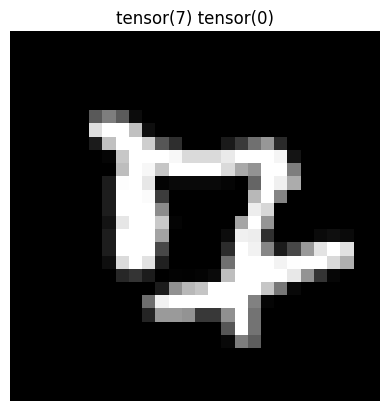

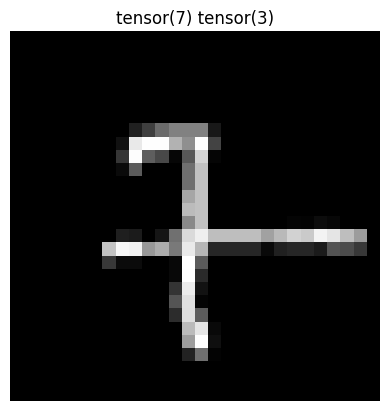

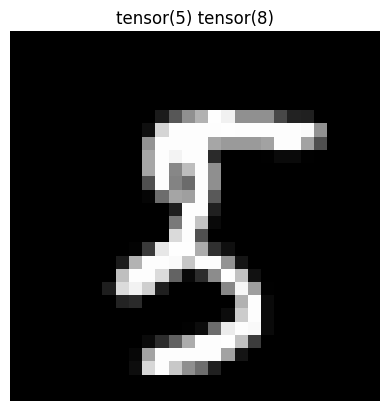

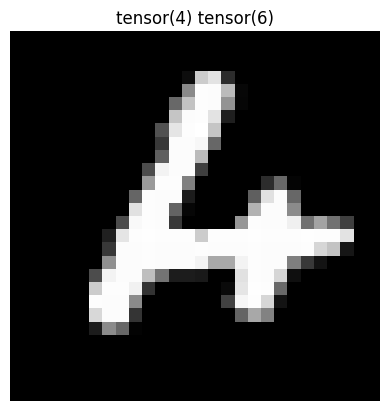

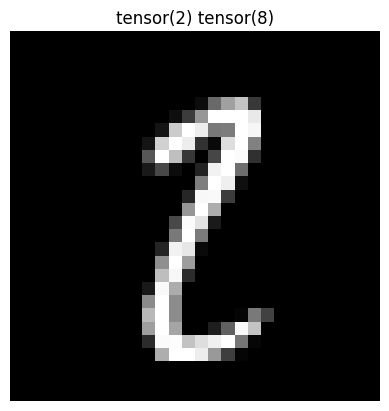

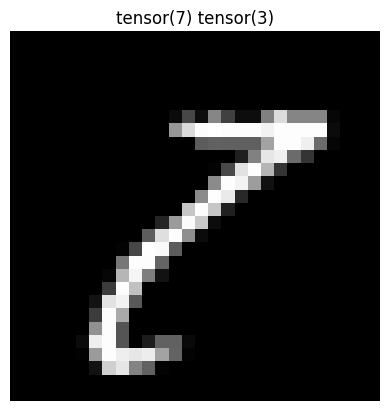

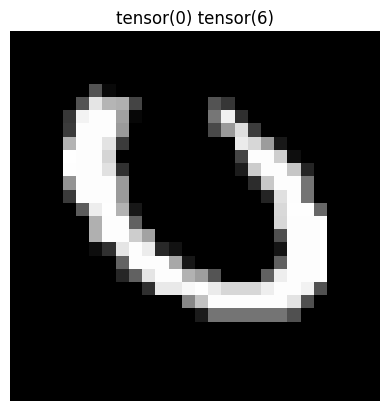

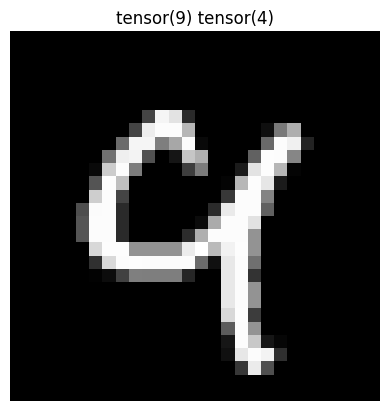

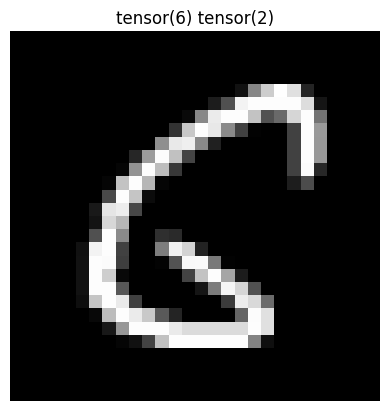

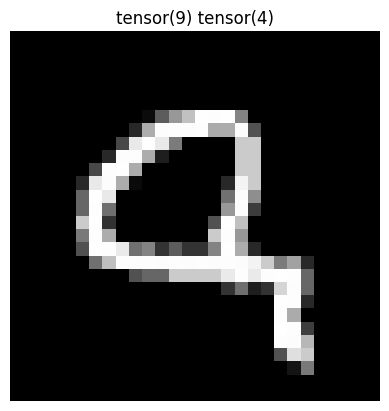

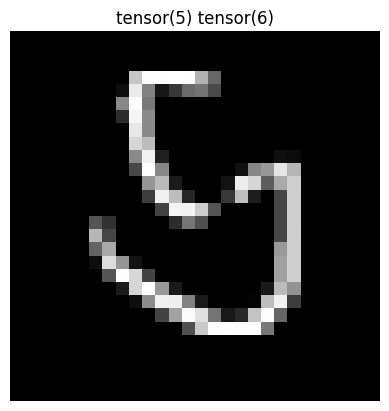

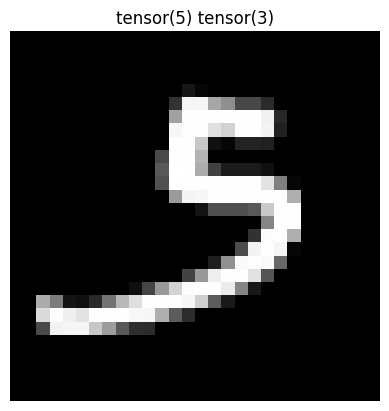

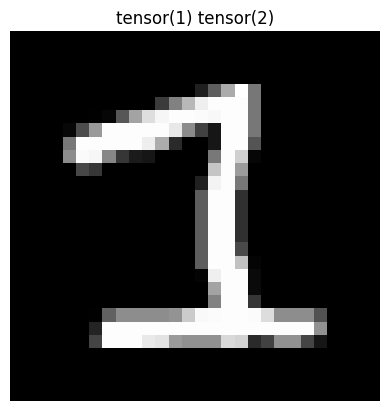

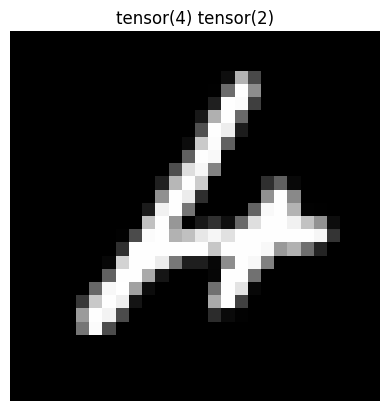

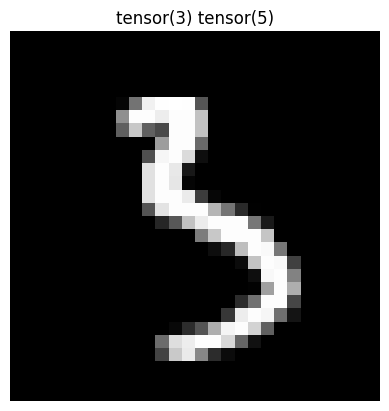

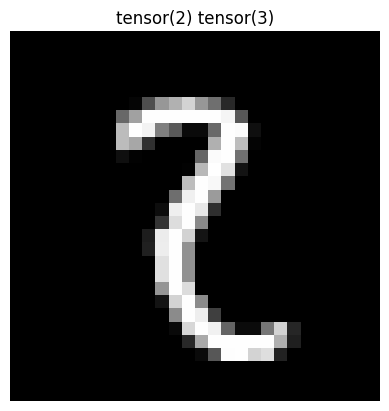

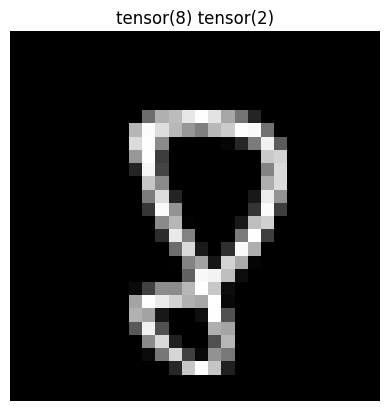

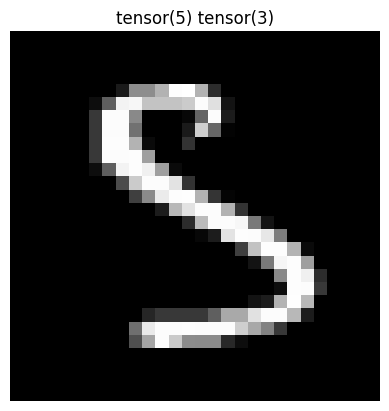

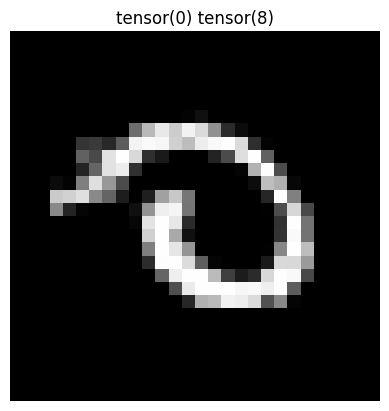

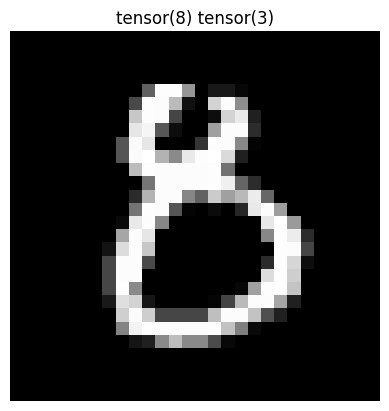

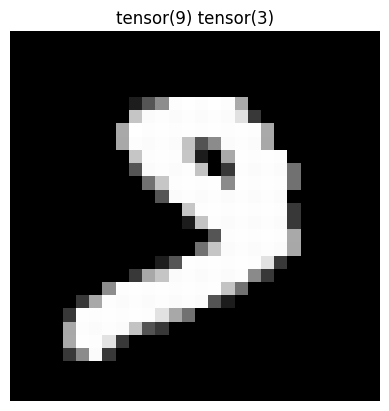

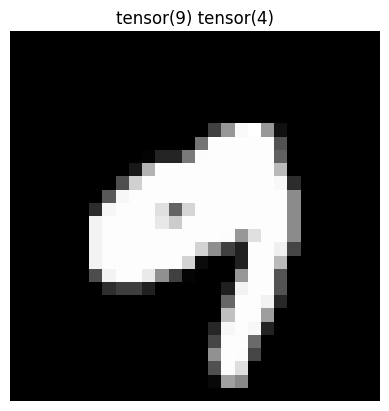

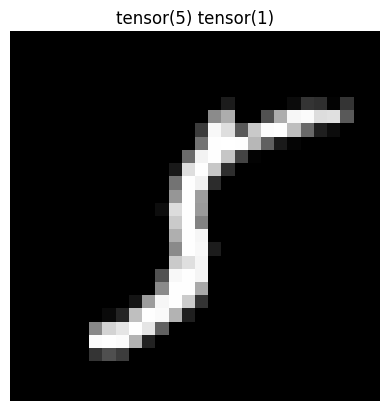

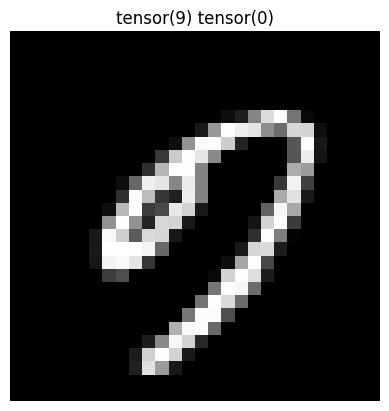

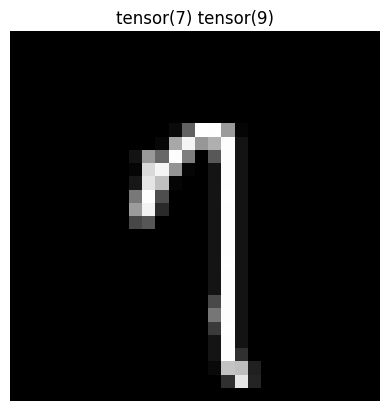

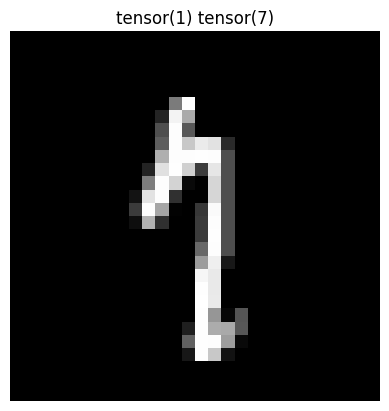

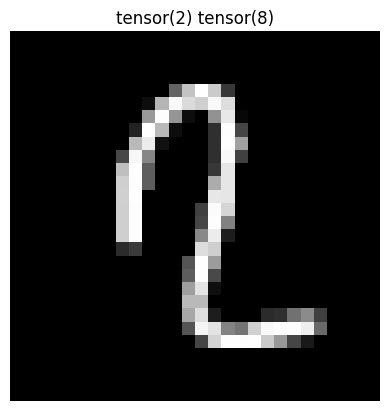

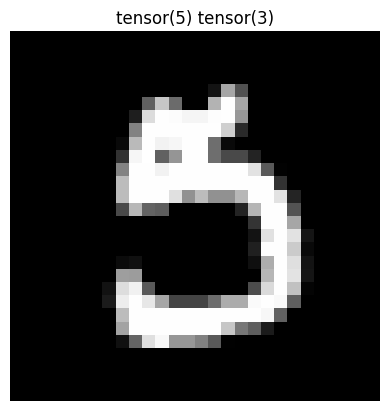

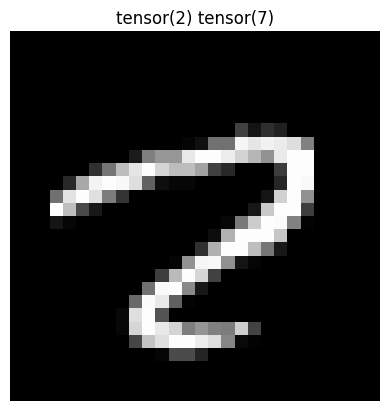

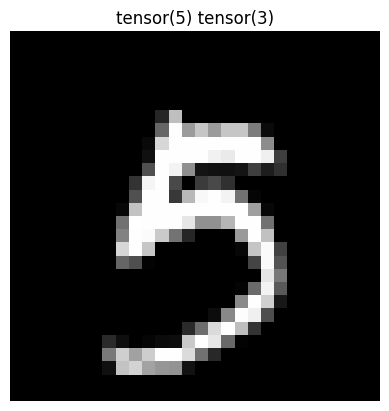

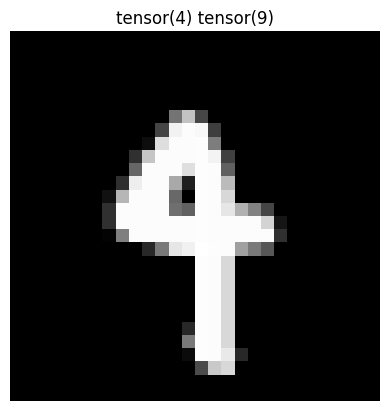

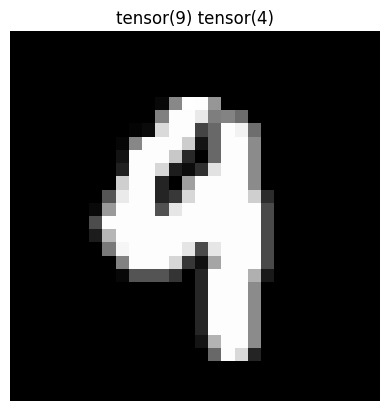

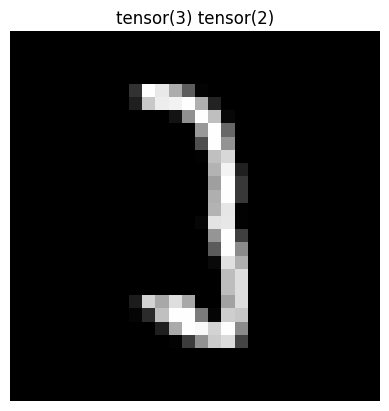

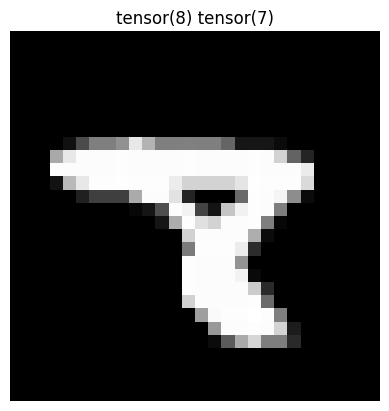

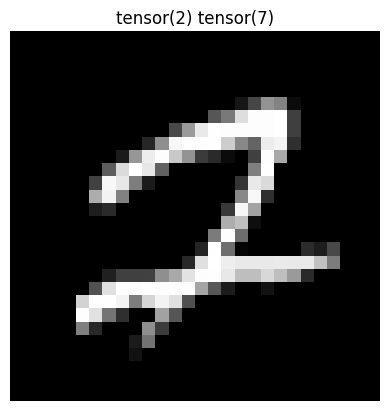

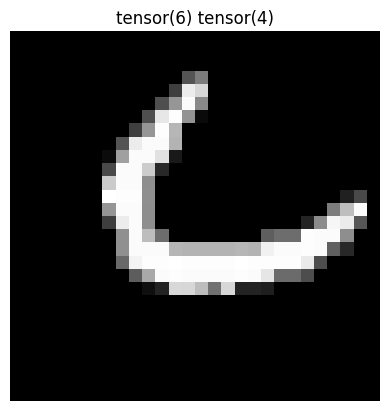

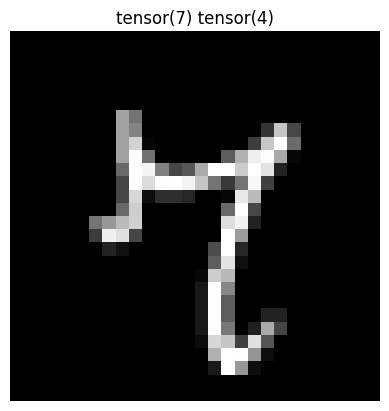

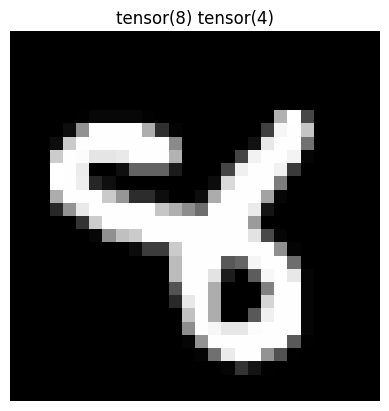

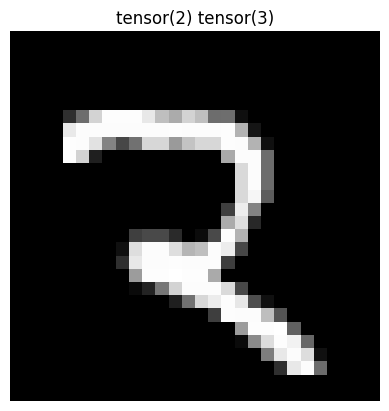

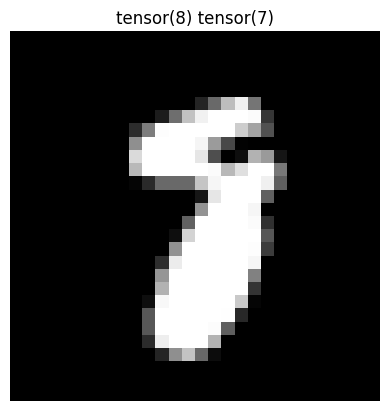

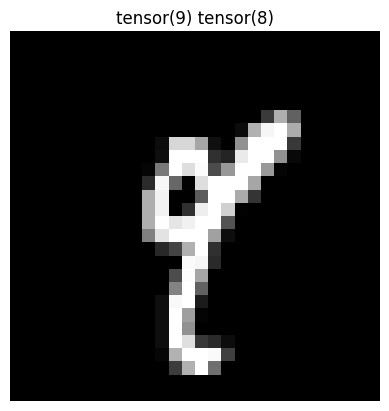

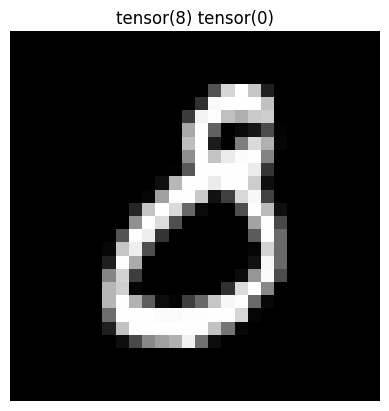

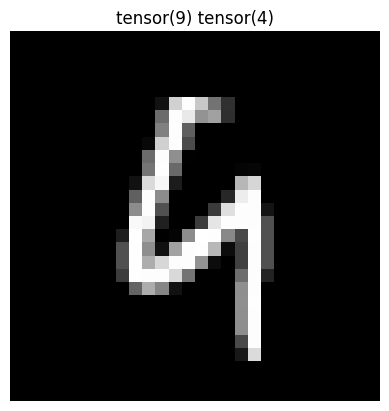

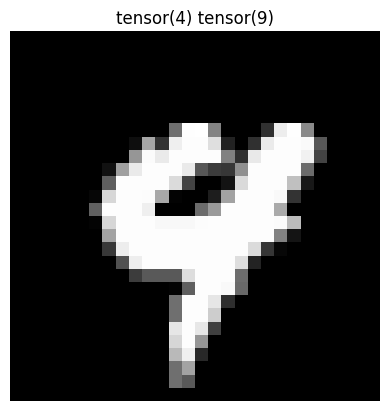

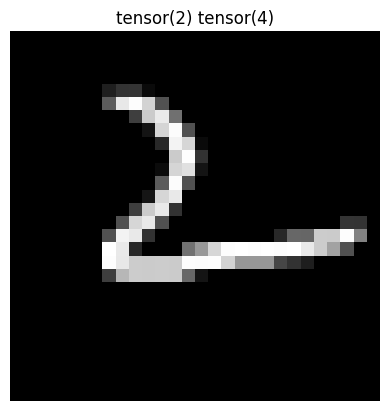

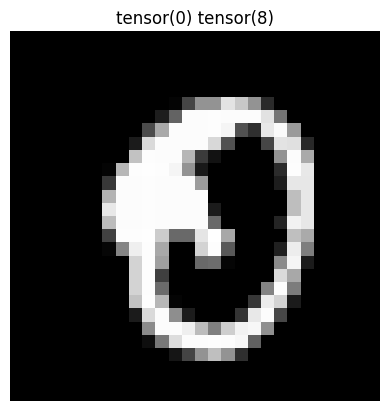

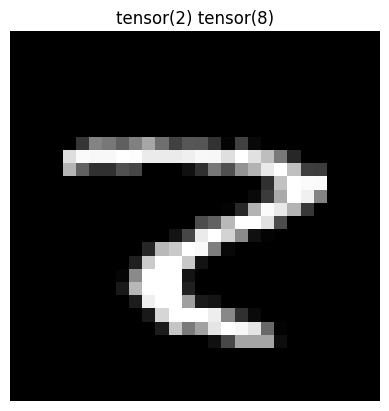

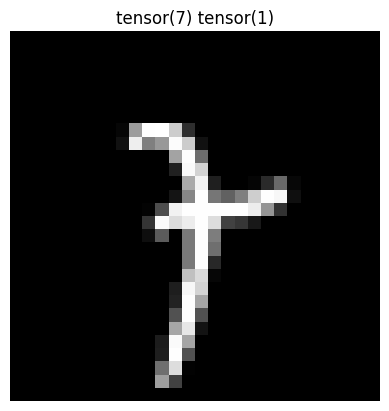

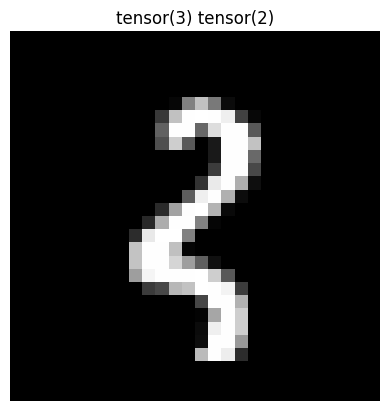

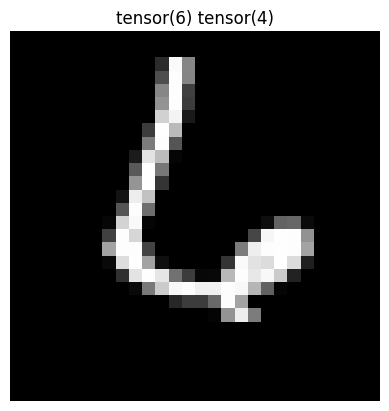

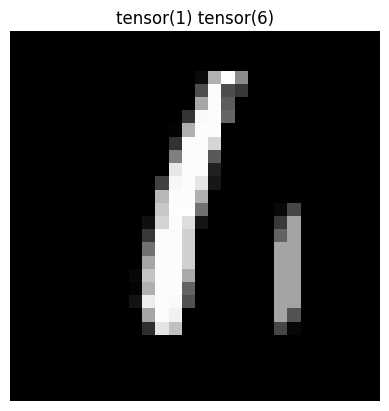

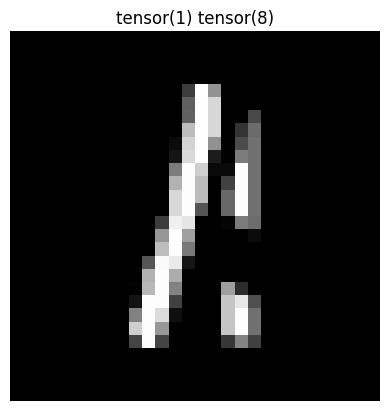

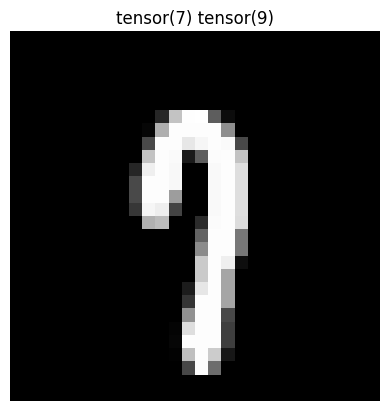

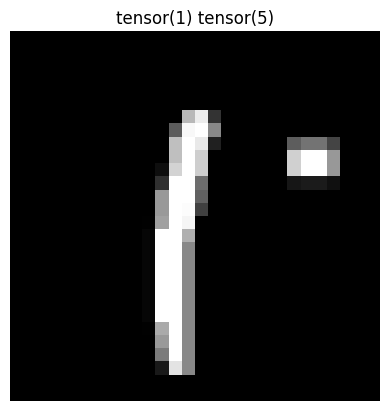

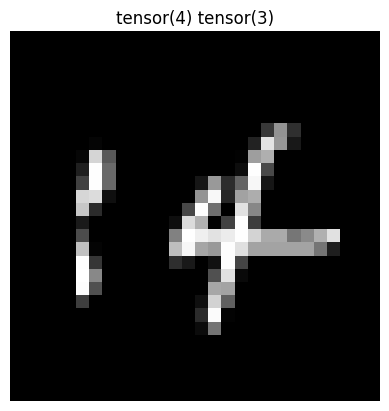

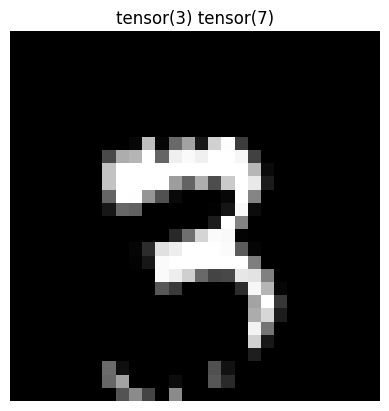

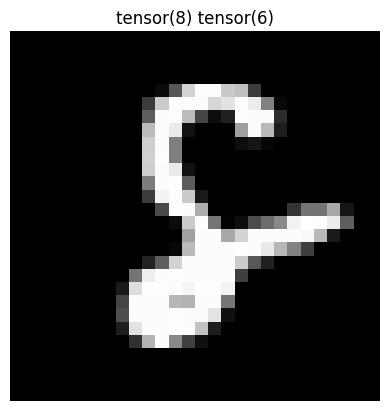

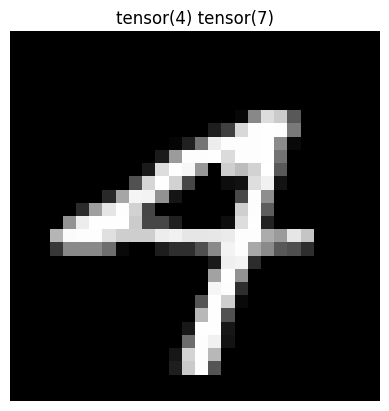

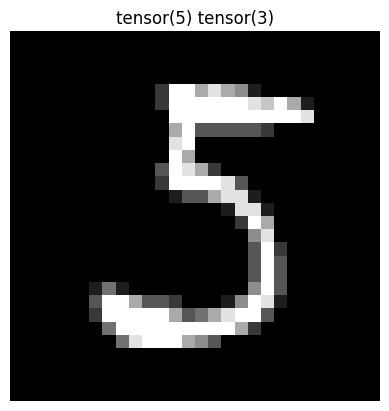

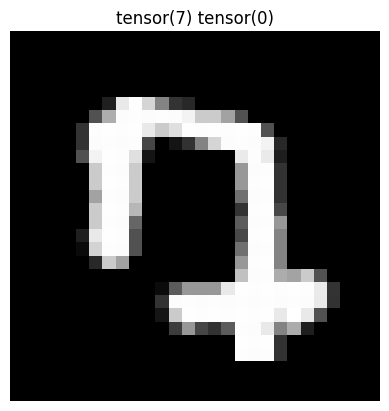

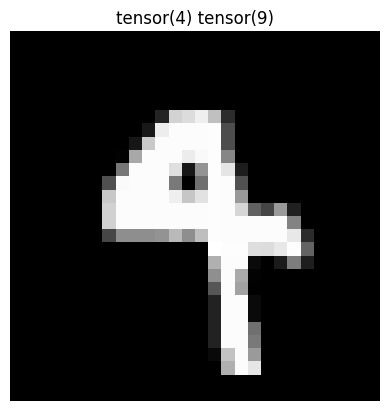

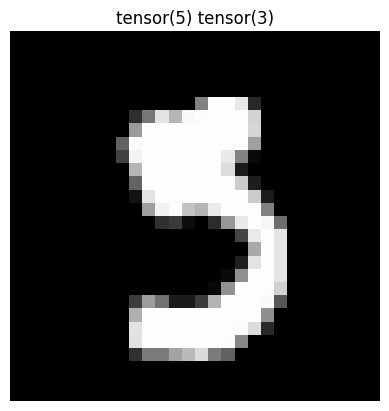

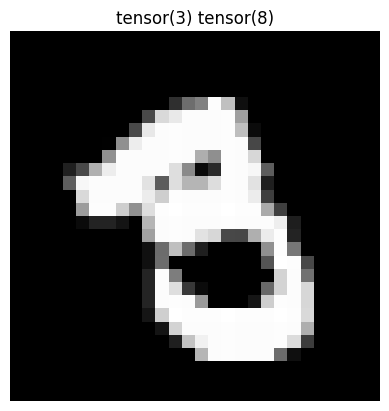

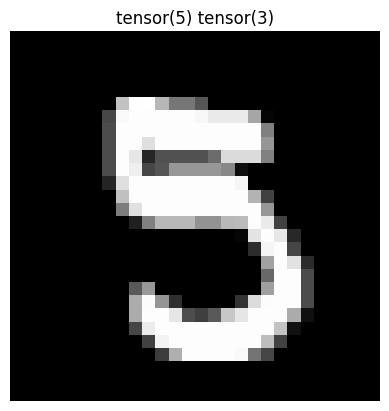

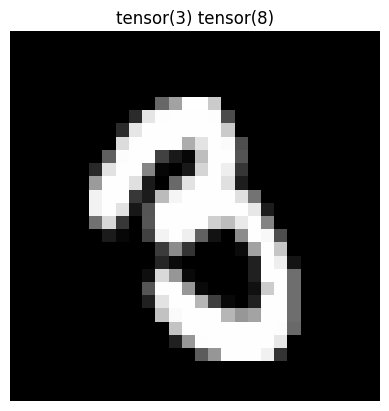

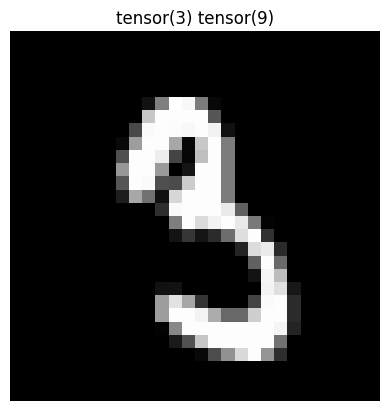

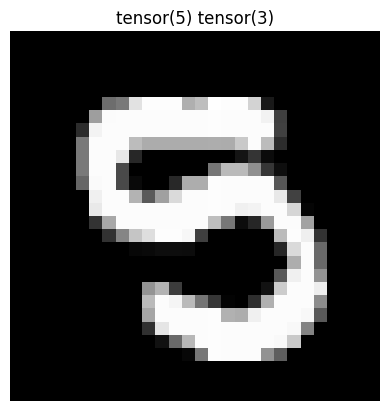

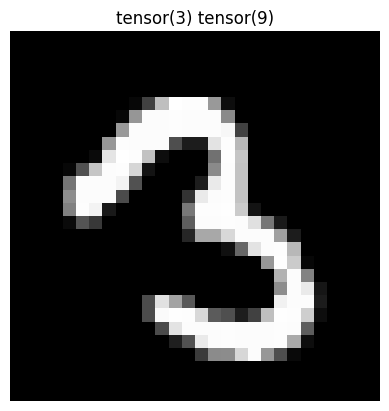

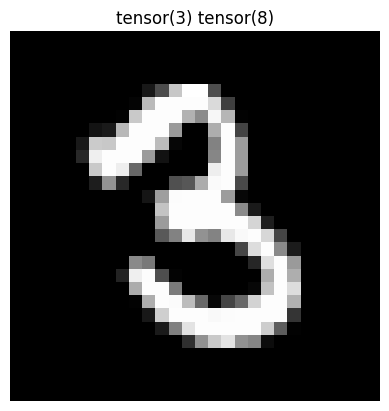

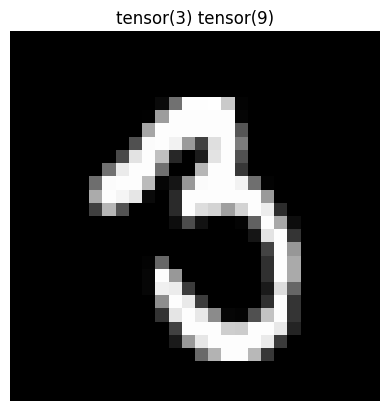

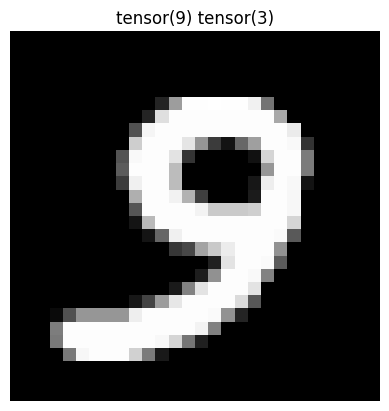

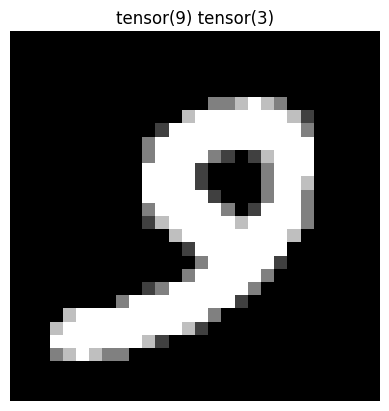

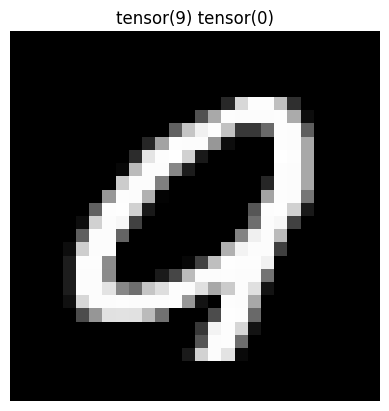

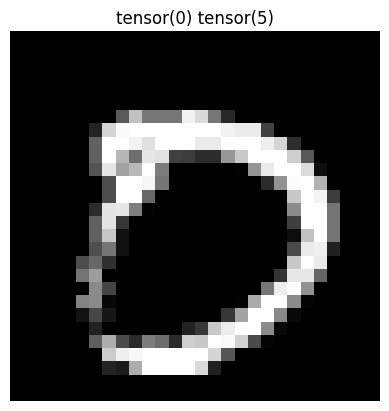

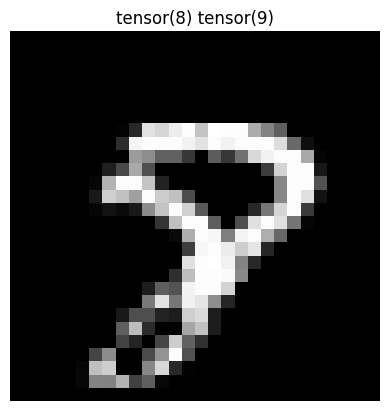

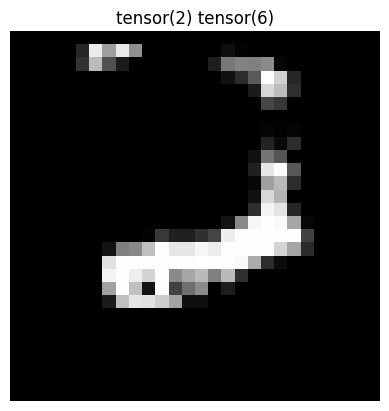

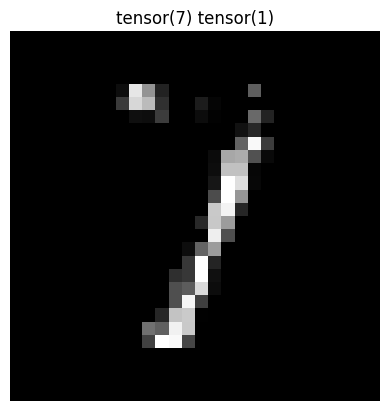

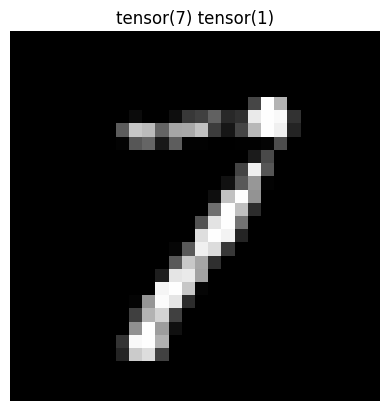

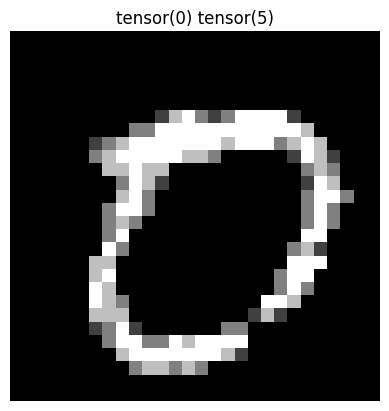

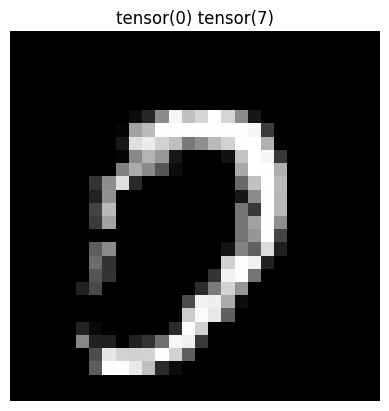

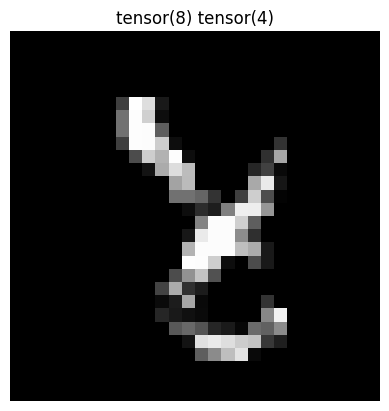

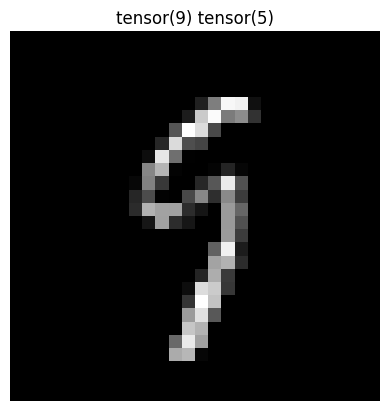

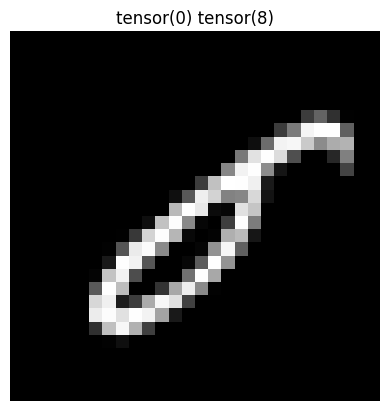

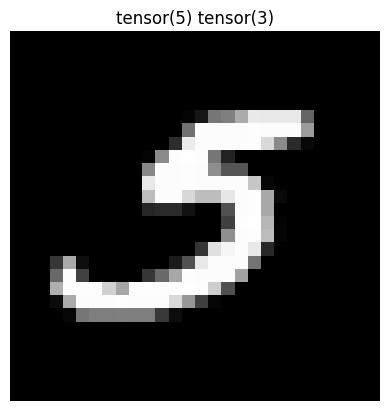

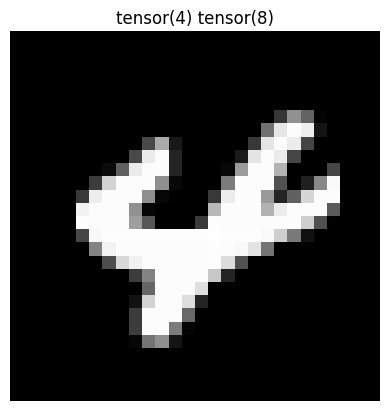

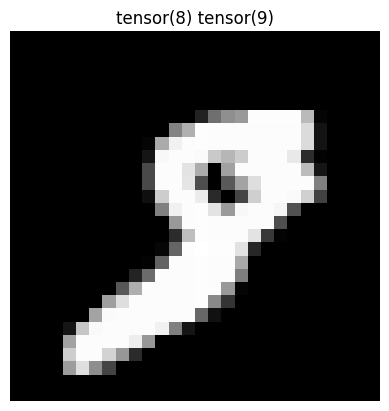

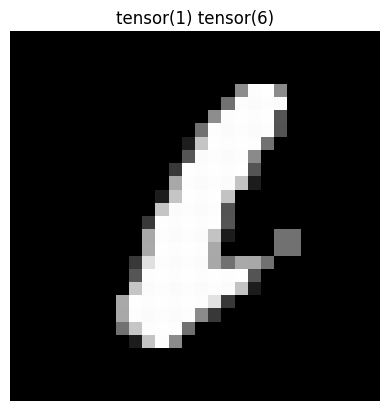

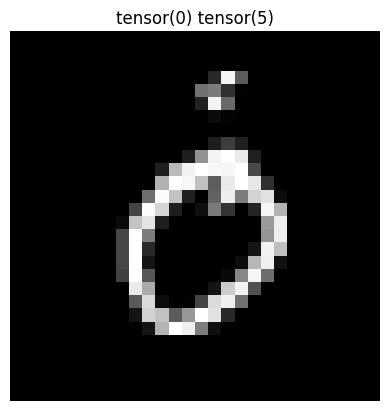

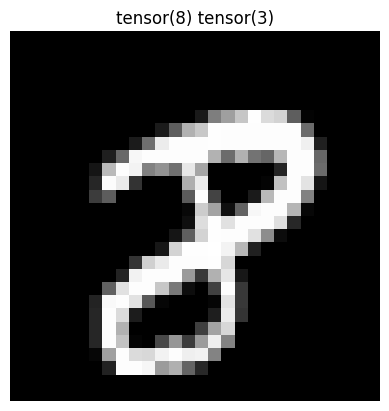

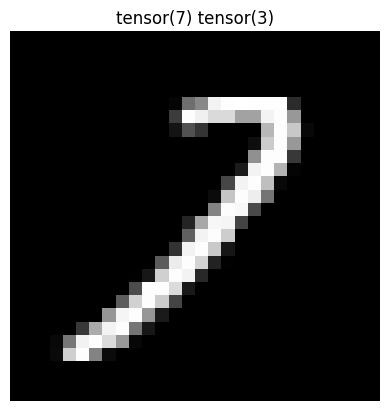

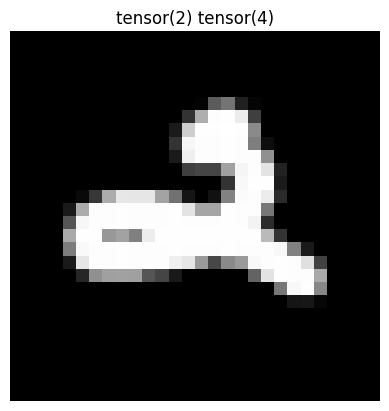

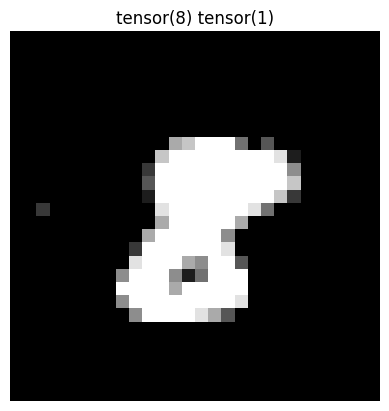

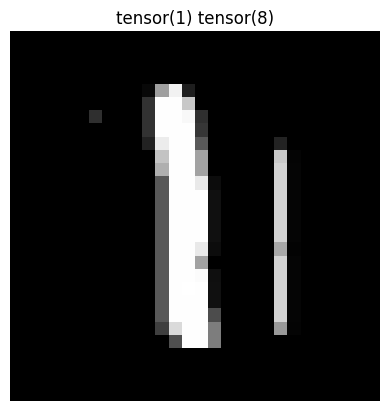

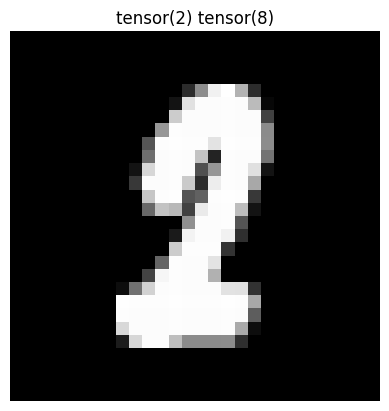

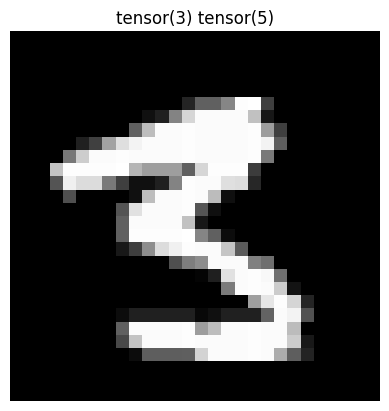

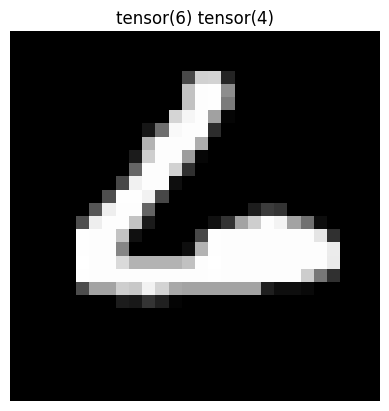

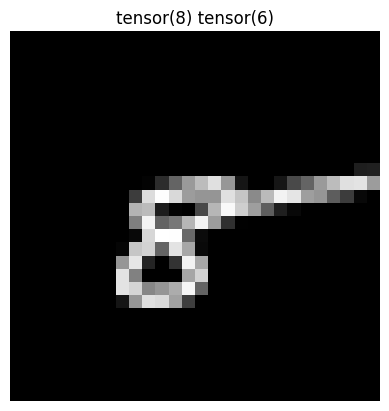

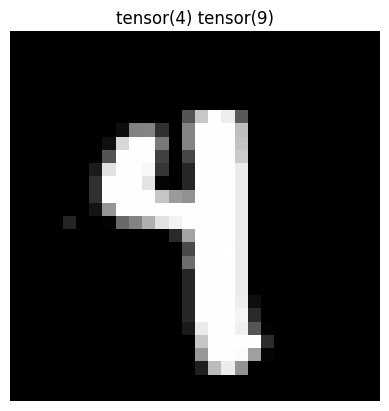

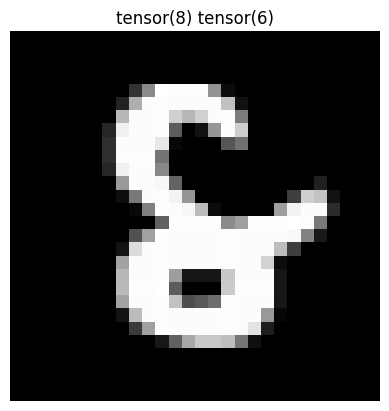

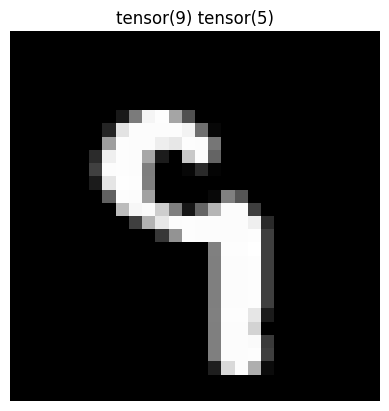

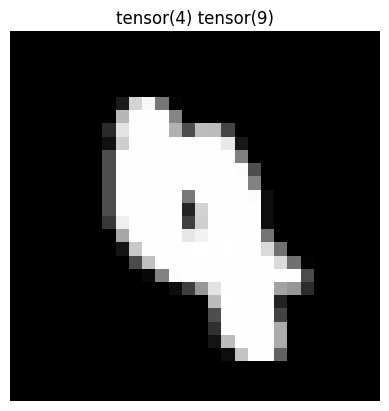

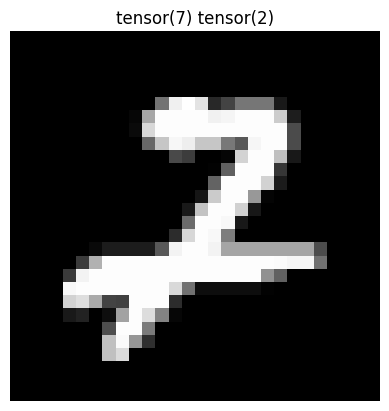

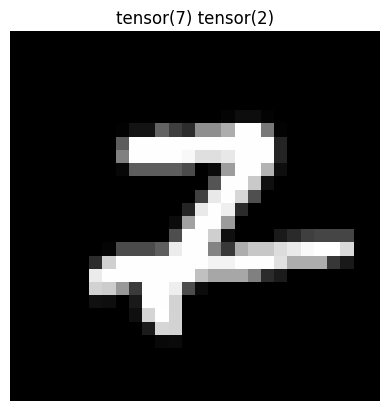

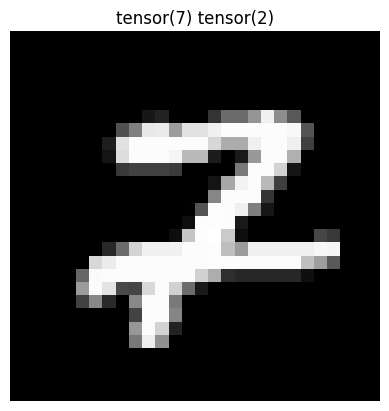

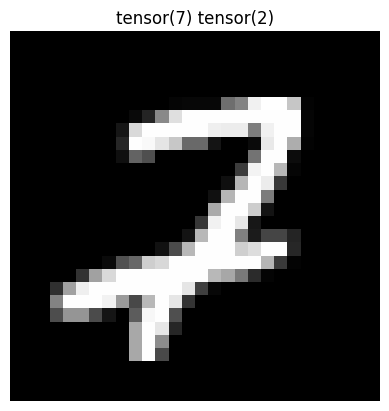

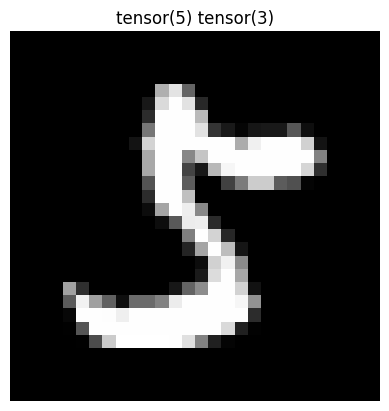

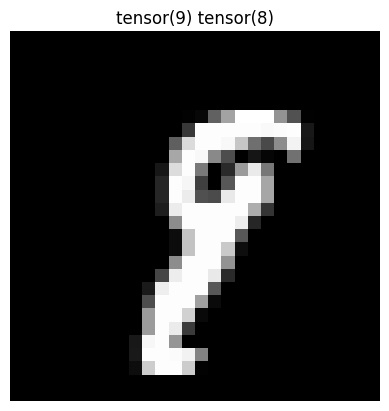

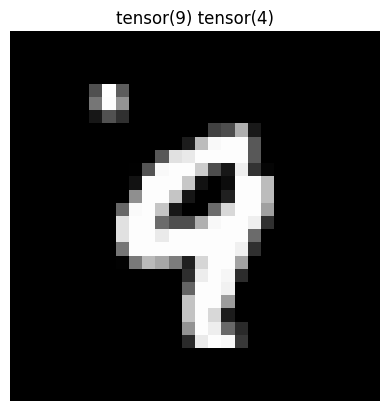

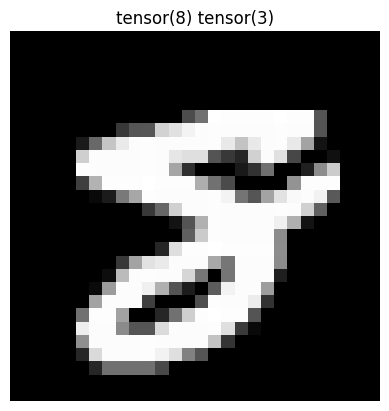

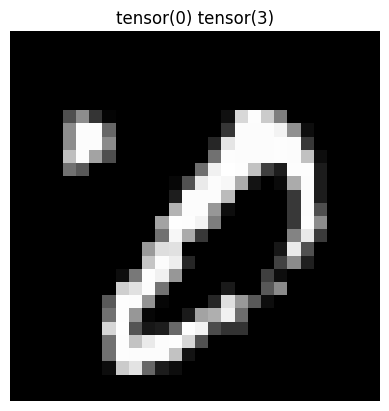

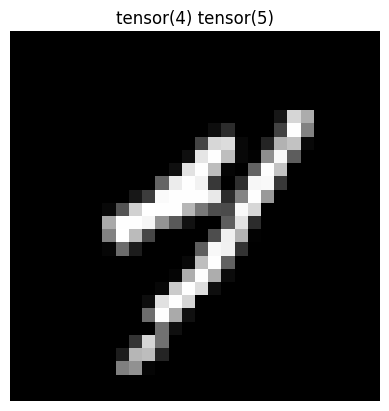

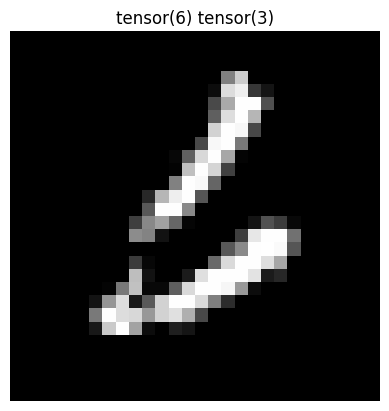

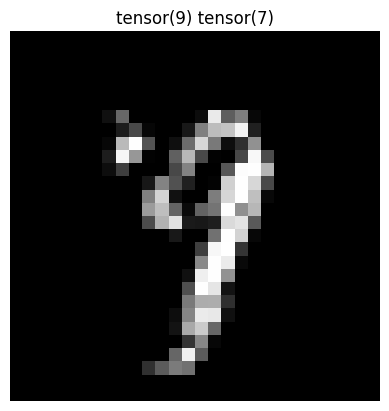

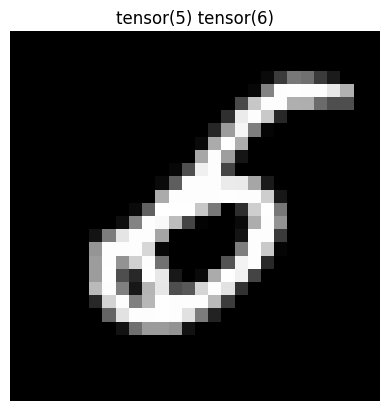

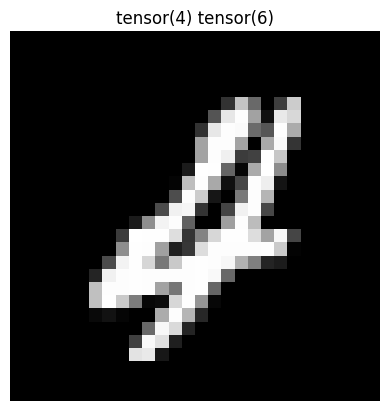

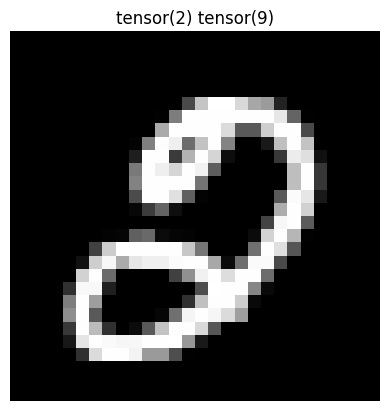

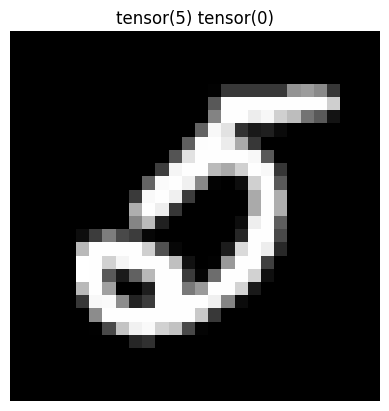

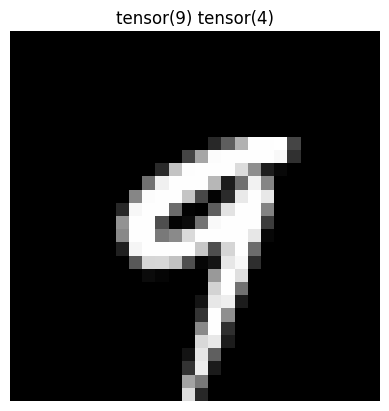

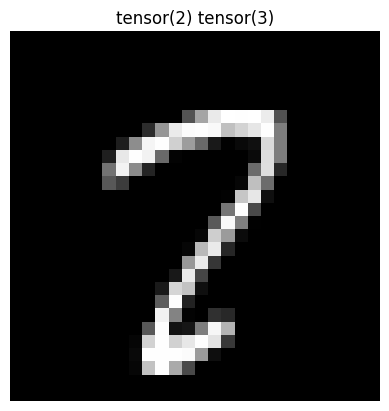

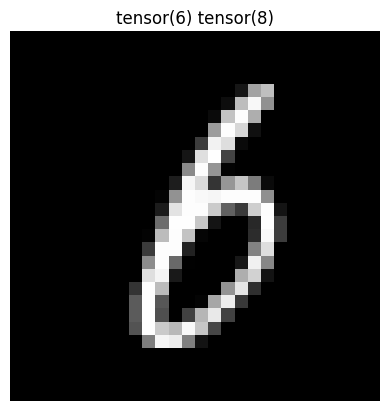

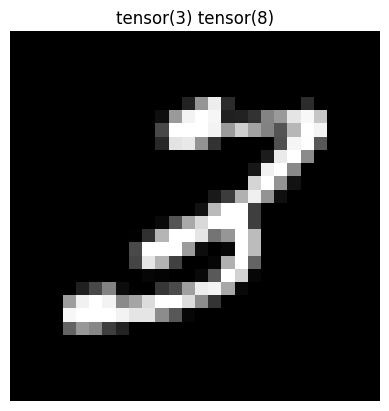

236


In [7]:
with torch.no_grad():
    model.eval()
    
    outputs_test = model(all_test_inputs)

count = 0

for k in range(outputs_test.size()[0]):
    if outputs_test[k].argmax().item() != all_test_labels[k].item():
        count += 1
        plot(all_test_inputs[k], all_test_labels[k], outputs_test[k].argmax())
    
print(count)

In [8]:
with torch.no_grad():
    model.eval()
    outputs_test = model(all_test_inputs)
    test_loss = loss_fn(outputs_test, all_test_labels) 
    print('test loss is {}'.format(test_loss))

test loss is 0.08051104098558426


In [9]:
train_acc = torch.sum(outputs_test.argmax(dim=1) == all_test_labels)
final_train_acc = train_acc/10000
final_train_acc

tensor(0.9764)